# Classification Test #3

In [1]:
import sdm as sdmlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import urllib, cStringIO
import random
from IPython.core.display import display, Image as IPythonImage
%matplotlib inline

In [2]:
width = 30
height = 30
noise_flip = True

In [3]:
def gen_img(letter='A'):
    img = Image.new('RGBA', (30, 30), (255, 255, 255))
    font = ImageFont.truetype('Arial.ttf', 30)
    draw = ImageDraw.Draw(img)
    draw.text((5, 0), letter, (0, 0, 0), font=font)
    return img

In [4]:
def gen_noise_add(img, p=0.15, flip=False):
    img2 = img.copy()
    draw = ImageDraw.Draw(img2)
    for py in xrange(height):
        for px in xrange(width):
            if random.random() < p:
                if flip:
                    pixel = img.getpixel((px, py))
                    value = sum([int(x/255+0.5) for x in pixel[:3]])//3
                    assert value == 0 or value == 1
                    value = (1 - value)*255
                    draw.point((px, py), fill=(value, value, value))
                else:
                    draw.point((px, py), fill=(0, 0, 0))
    return img2

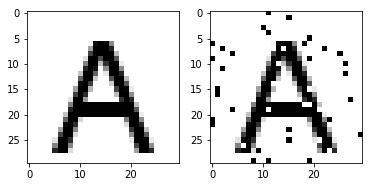

In [5]:
img = gen_img();
img2 = gen_noise_add(img, p=0.05, flip=noise_flip)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img2);

In [6]:
def to_bitstring(img):
    v = []
    bs = sdmlib.Bitstring.init_ones(1000)
    for py in xrange(height):
        for px in xrange(width):
            pixel = img.getpixel((px, py))
            value = sum([int(x/255+0.5) for x in pixel[:3]])//3
            assert value == 0 or value == 1
            idx = px+width*py
            assert idx >= 0 and idx < 1000, 'Ops {} {} {}'.format(x, y, idx)
            bs.set_bit(idx, value)
            v.append(value)
    v2 = [bs.get_bit(i) for i in xrange(height*width)]
    assert v == v2
    return bs

In [7]:
def to_img(bs):
    img = Image.new('RGBA', (30, 30), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    for py in xrange(height):
        for px in xrange(width):
            idx = px+width*py
            assert idx >= 0 and idx < 1000, 'Ops {} {} {}'.format(x, y, idx)
            x = 255*bs.get_bit(idx)
            draw.point((px, py), fill=(x, x, x))
    return img

In [8]:
bits = 1000
sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

In [9]:
address_space = sdmlib.AddressSpace.init_from_b64_file('sdm-letters.as')

In [10]:
counter = sdmlib.Counter.create_file('sdm-classification-3', bits, sample)
sdm = sdmlib.SDM(address_space, counter, 451, scanner_type)

In [11]:
def fill_memory(letter, label_bs, p=0.1, n=100):
    cols = 15
    rows = n//cols + 1
    plt.figure(figsize=(20,10))
    for i in xrange(n):
        img = gen_img(letter=letter);
        img2 = gen_noise_add(img, p=p, flip=noise_flip)
        #display(img2)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img2)
        bs = to_bitstring(img2)
        sdm.write(bs, label_bs)
    plt.show()

In [36]:
def read(letter, n=6, p=0.2, radius=None):
    img = gen_img(letter=letter);
    img2 = gen_noise_add(img, p=p, flip=noise_flip)
    plt.imshow(img2)
    
    bs2 = to_bitstring(img2)
    bs3 = sdm.read(bs2, radius=radius)
    
    label = min(label_to_bs.items(), key=lambda v: bs3.distance_to(v[1]))
    return label[0]

In [37]:
def iter_read(letter, n=10, p=0.2):
    cols = 15
    rows = n//cols + 1
    plt.figure(figsize=(20,10))
    
    wrong = 0
    correct = 0
    answers = []
    for i in xrange(n):
        plt.subplot(rows, cols, i+1)
        y = read(x, p=p)
        answers.append(y)
        if x == y:
            correct += 1
        else:
            wrong += 1
    plt.show()
    print '!! {} correct={:2d} wrong={:2d} answers={}'.format(x, correct, wrong, answers)

In [13]:
labels = list('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789')
label_to_bs = {}
for x in labels:
    label_to_bs[x] = sdmlib.Bitstring.init_random(1000)

Training for label A...


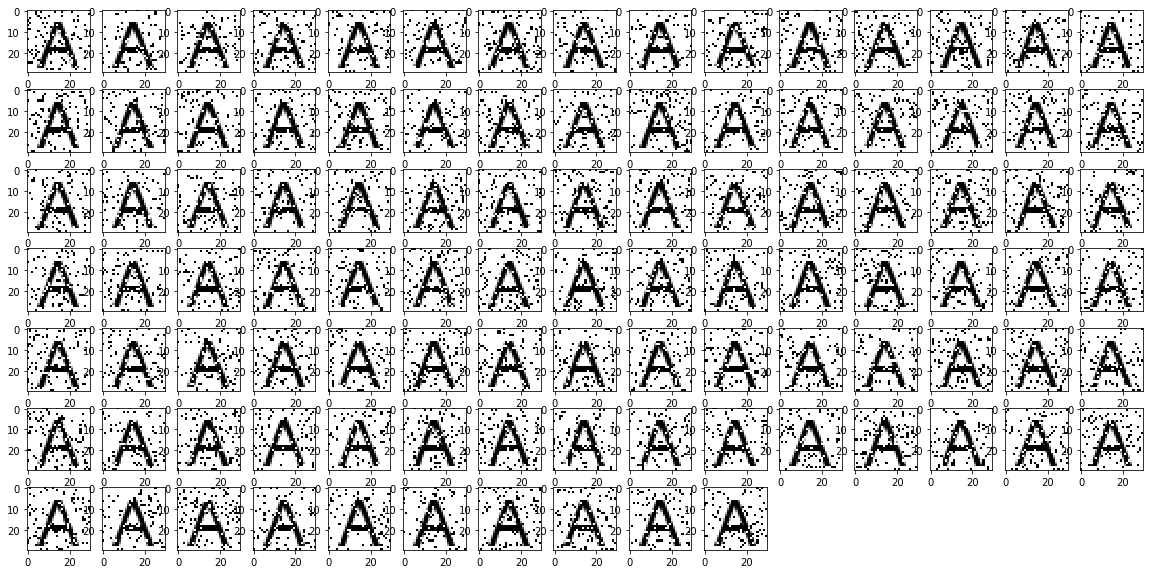

Training for label B...


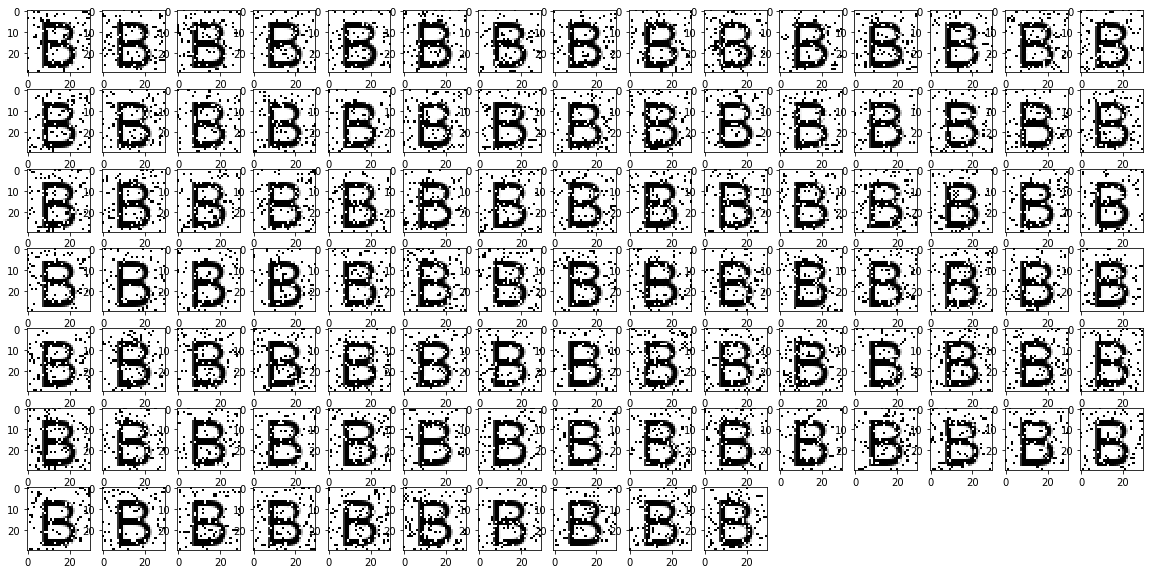

Training for label C...


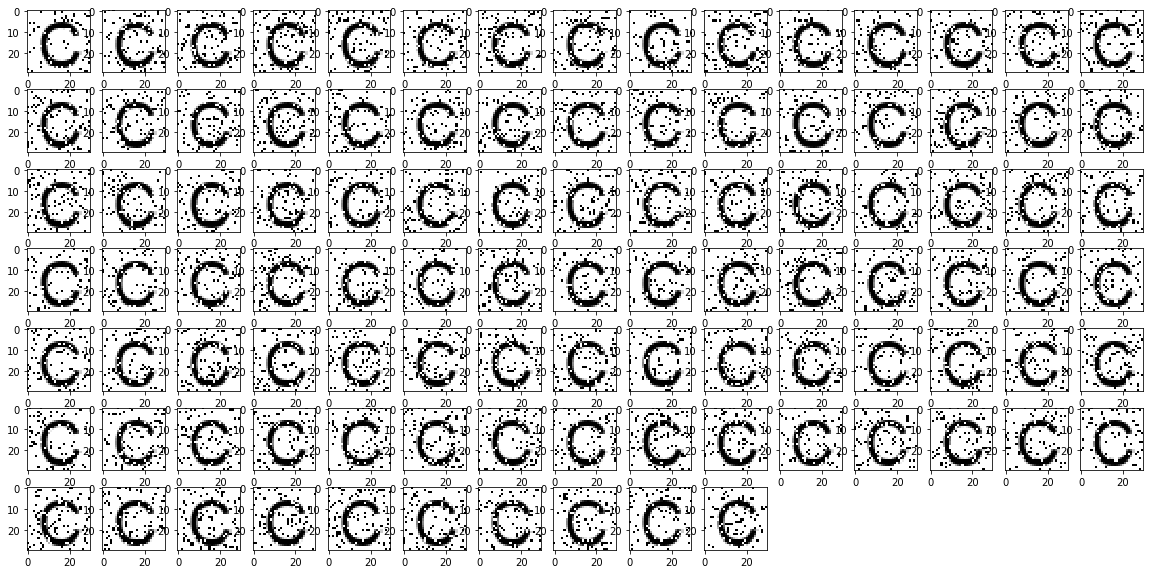

Training for label D...


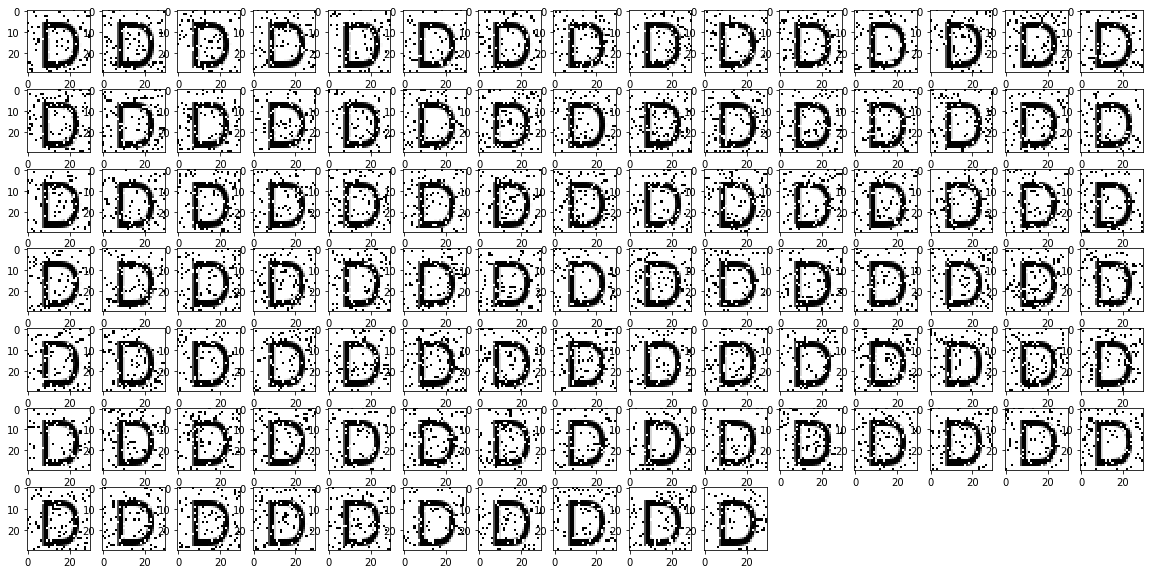

Training for label E...


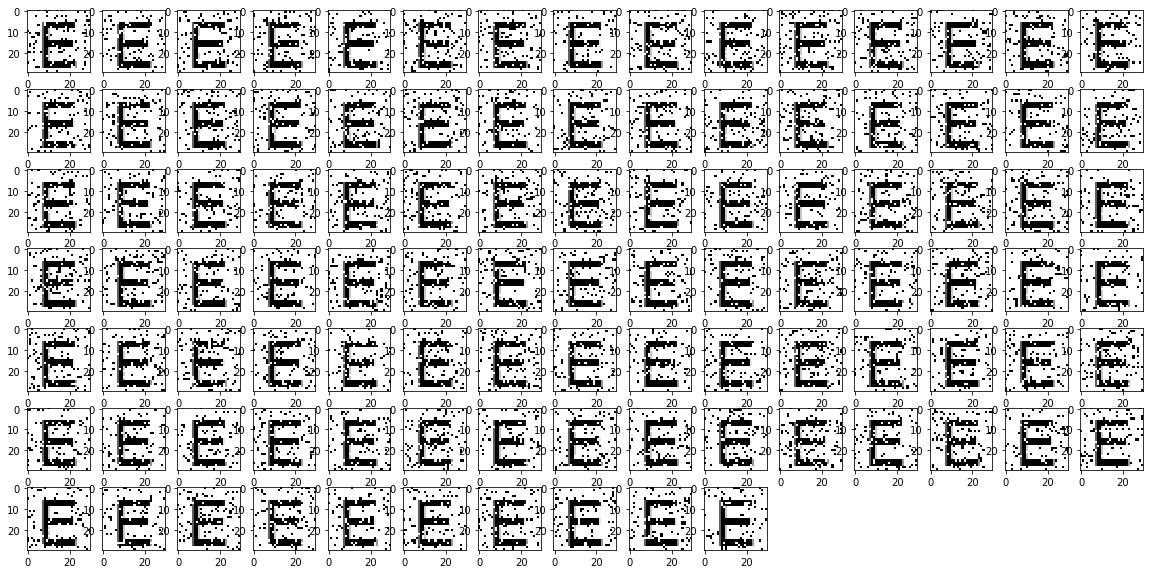

Training for label F...


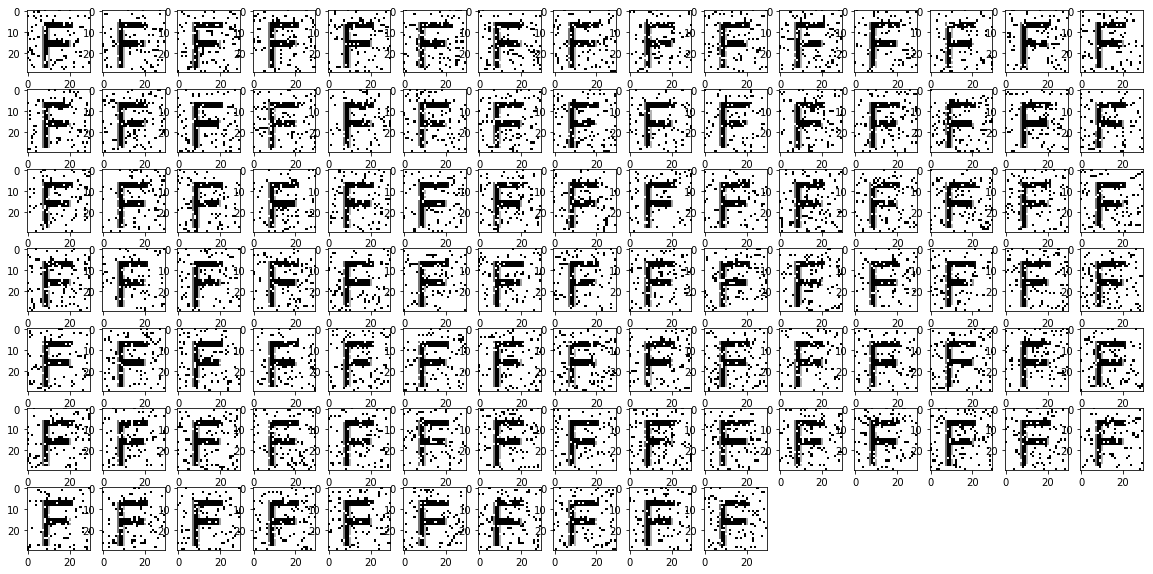

Training for label G...


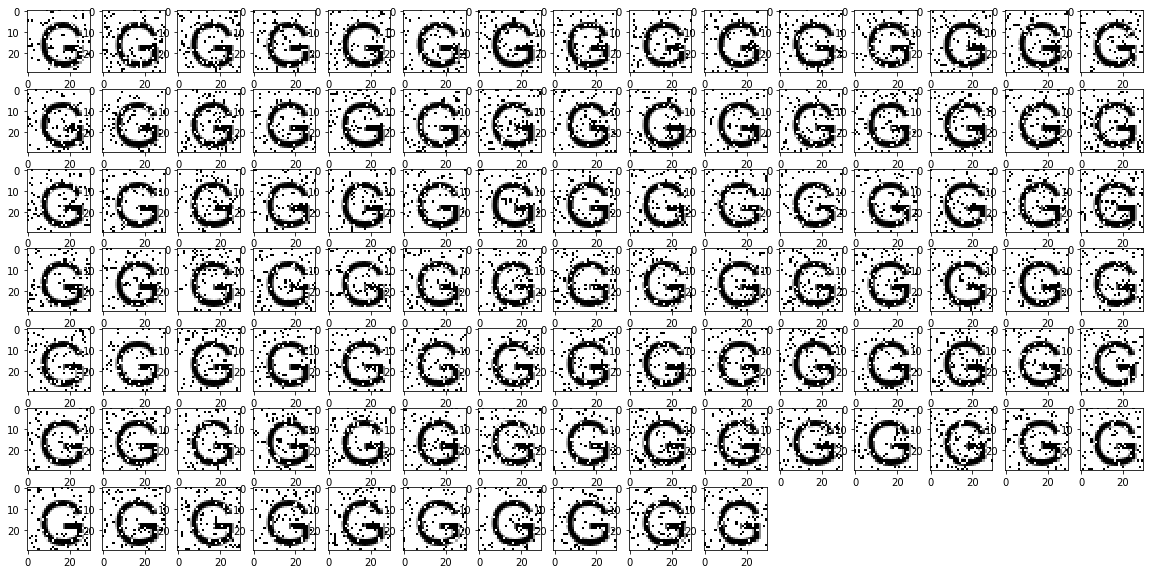

Training for label H...


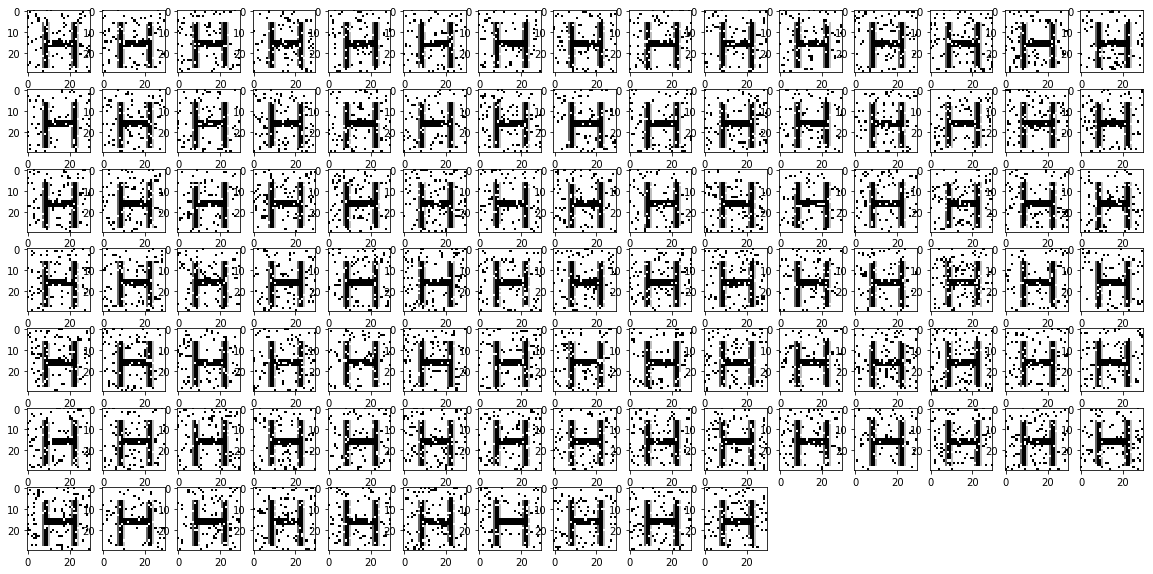

Training for label I...


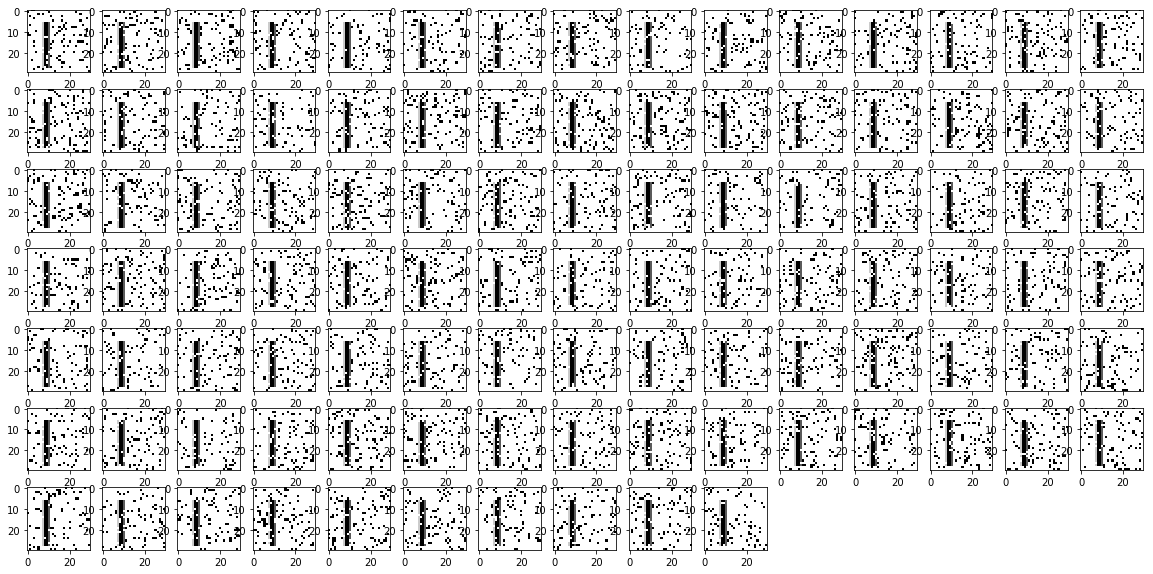

Training for label J...


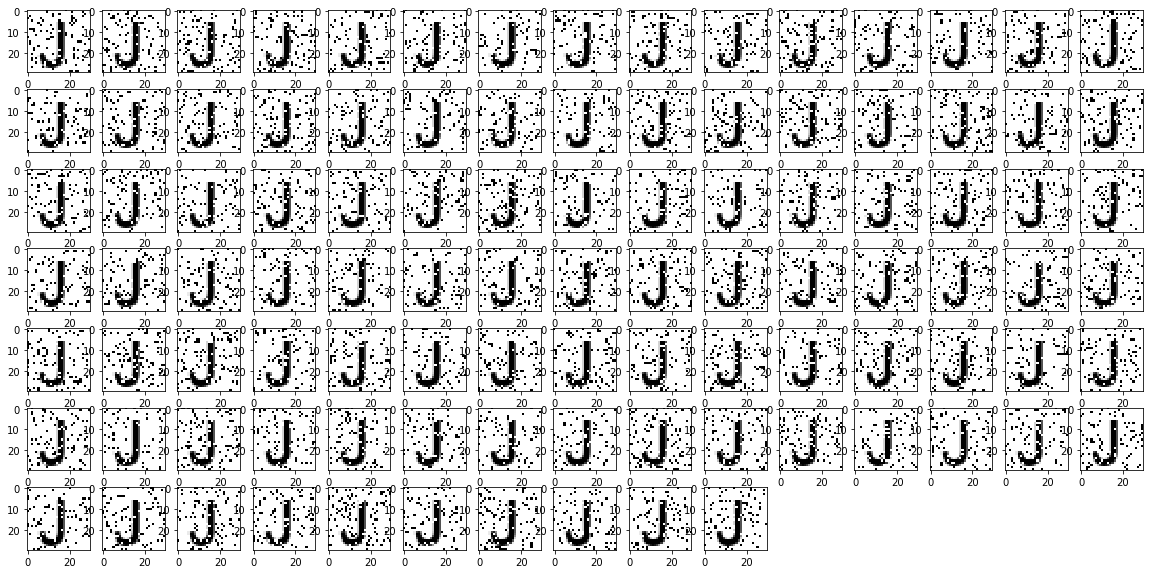

Training for label K...


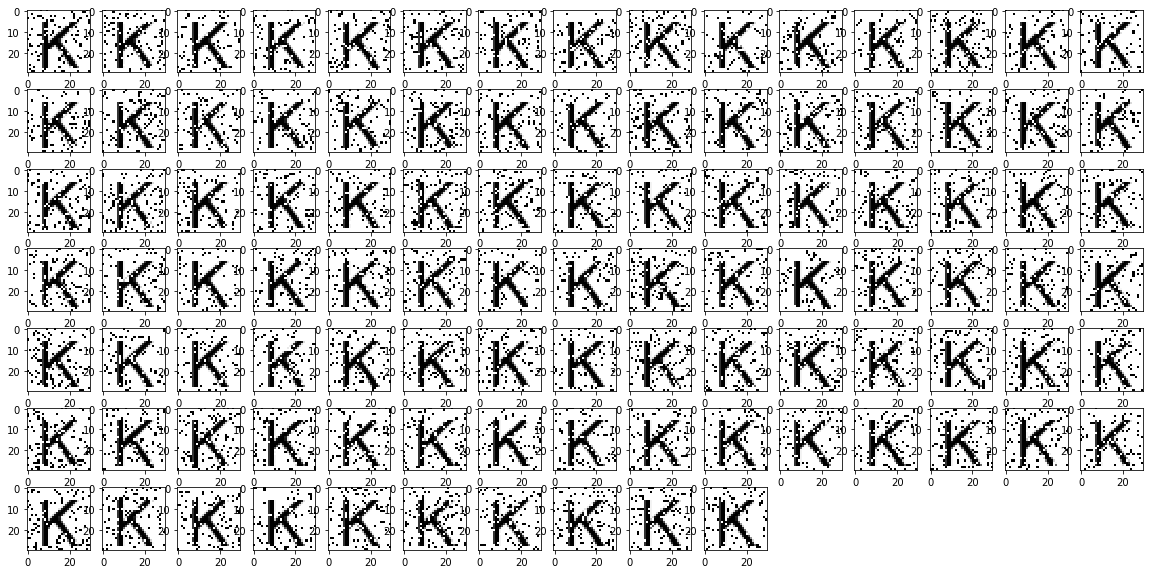

Training for label L...


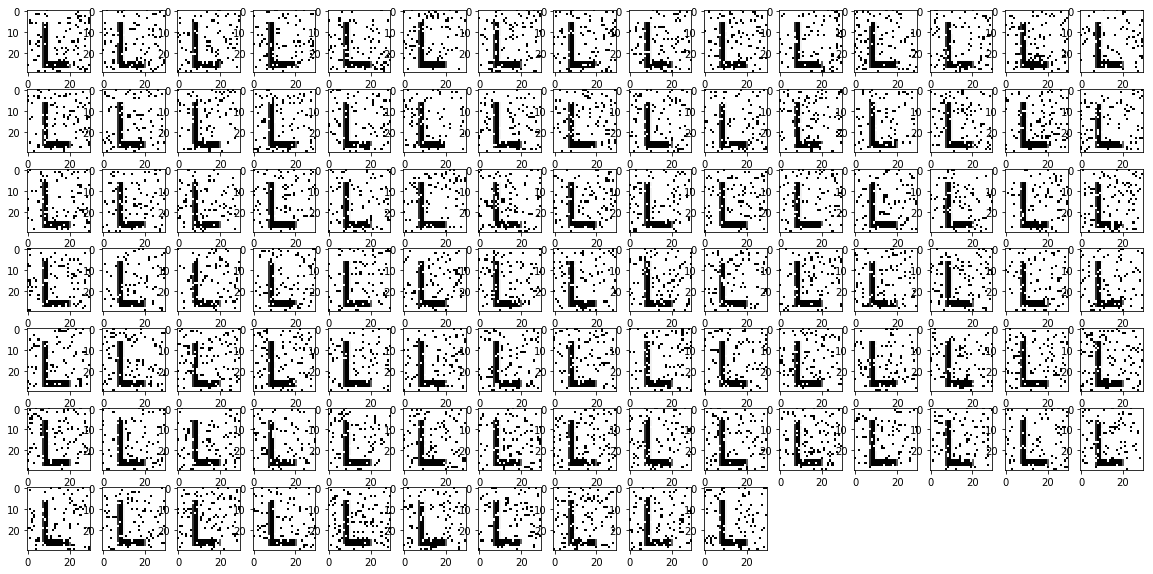

Training for label M...


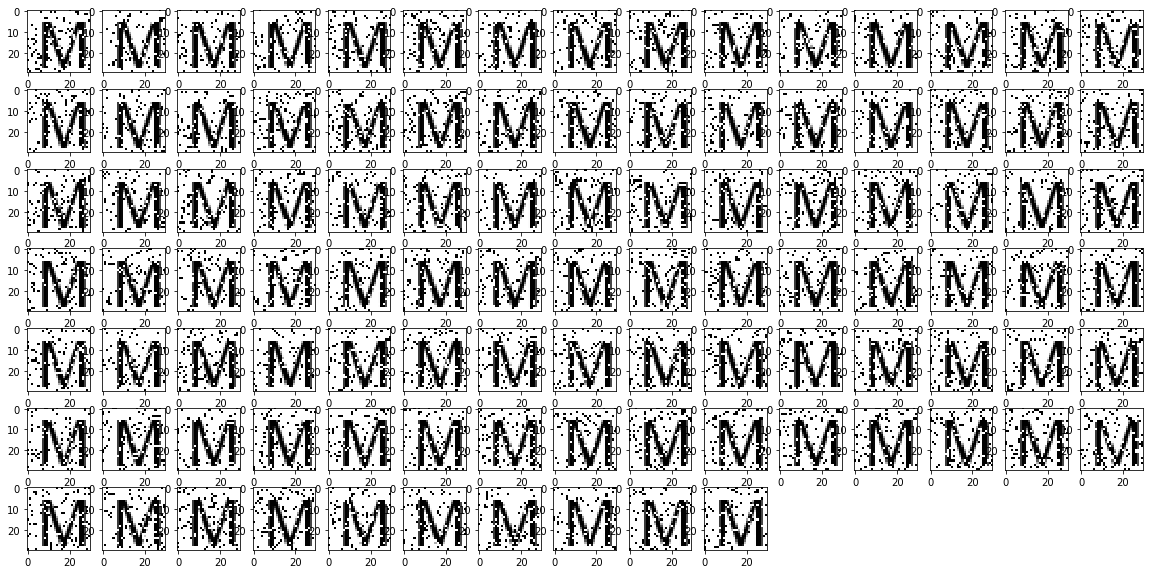

Training for label N...


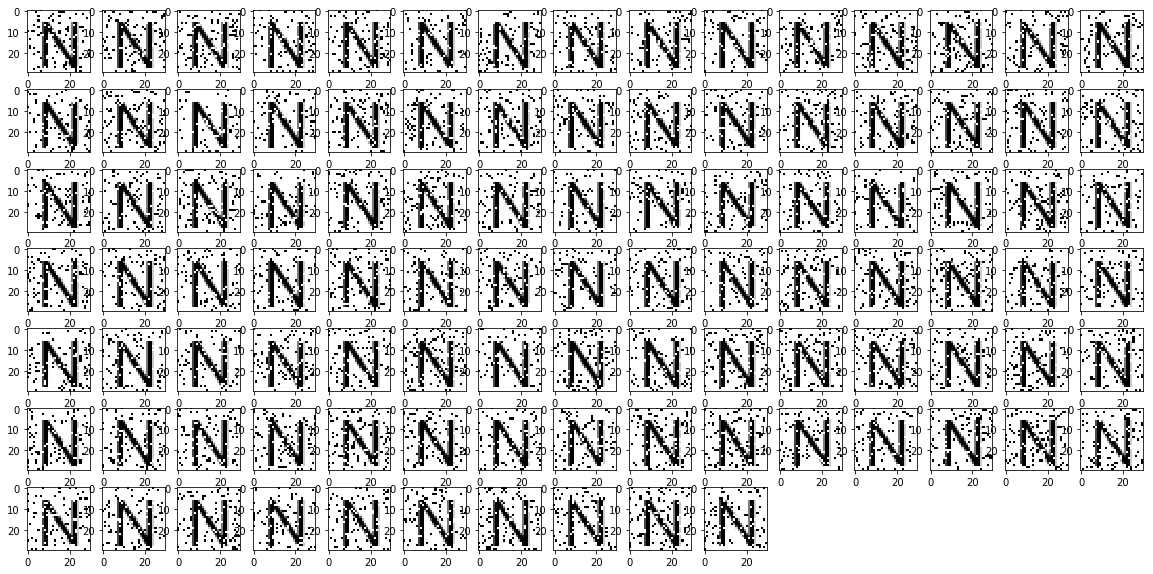

Training for label O...


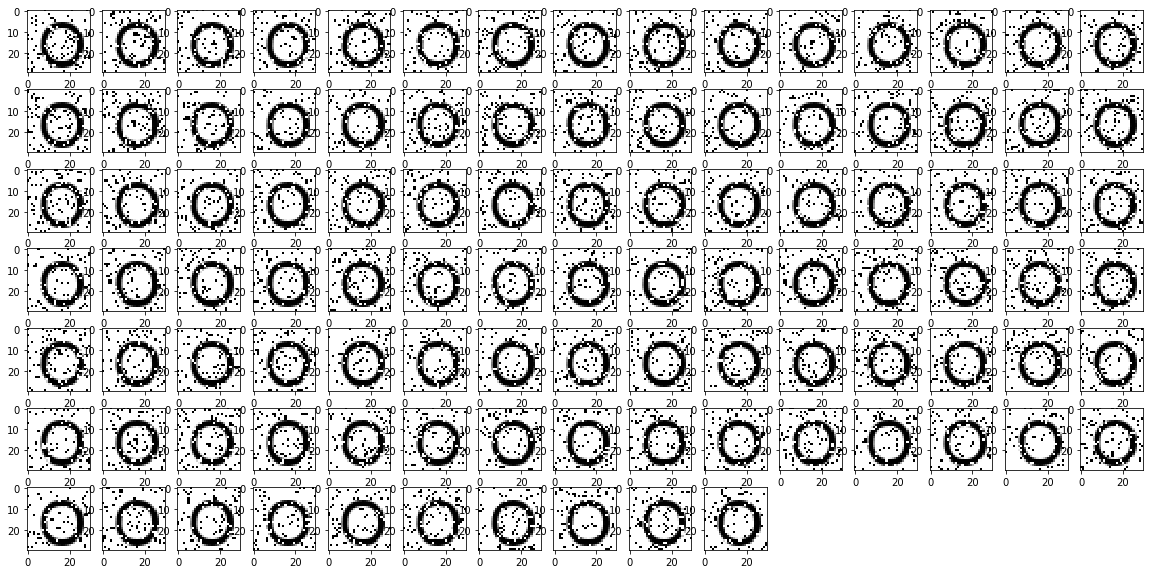

Training for label P...


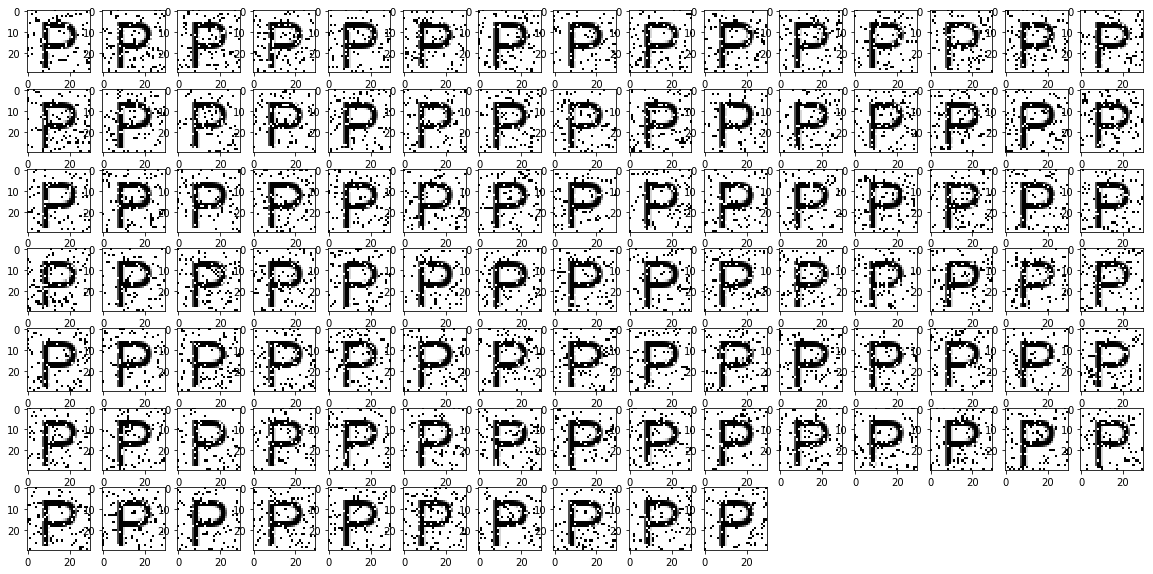

Training for label Q...


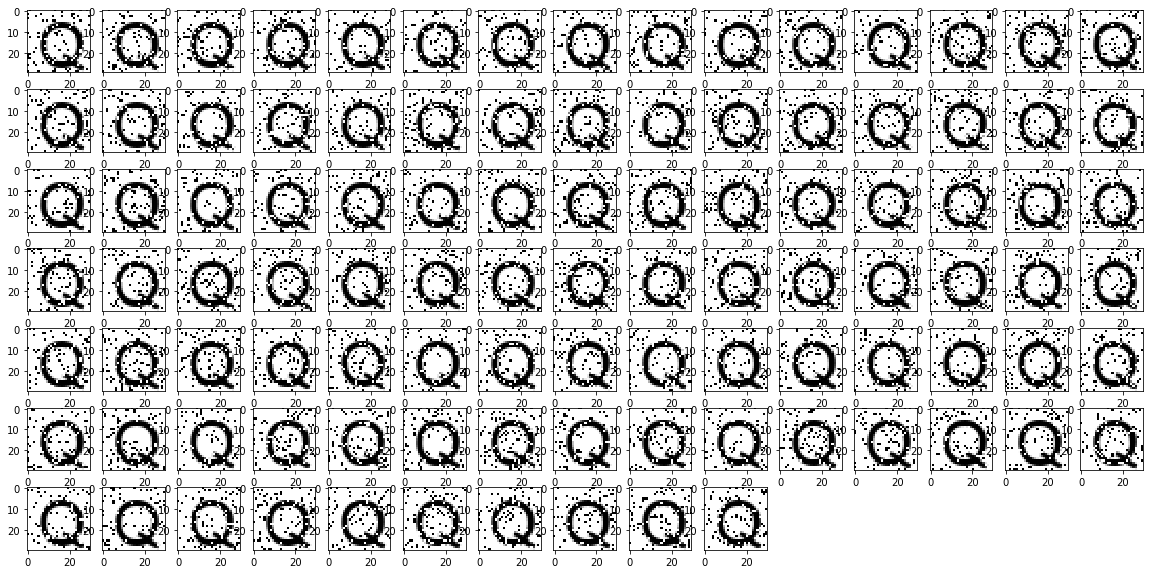

Training for label R...


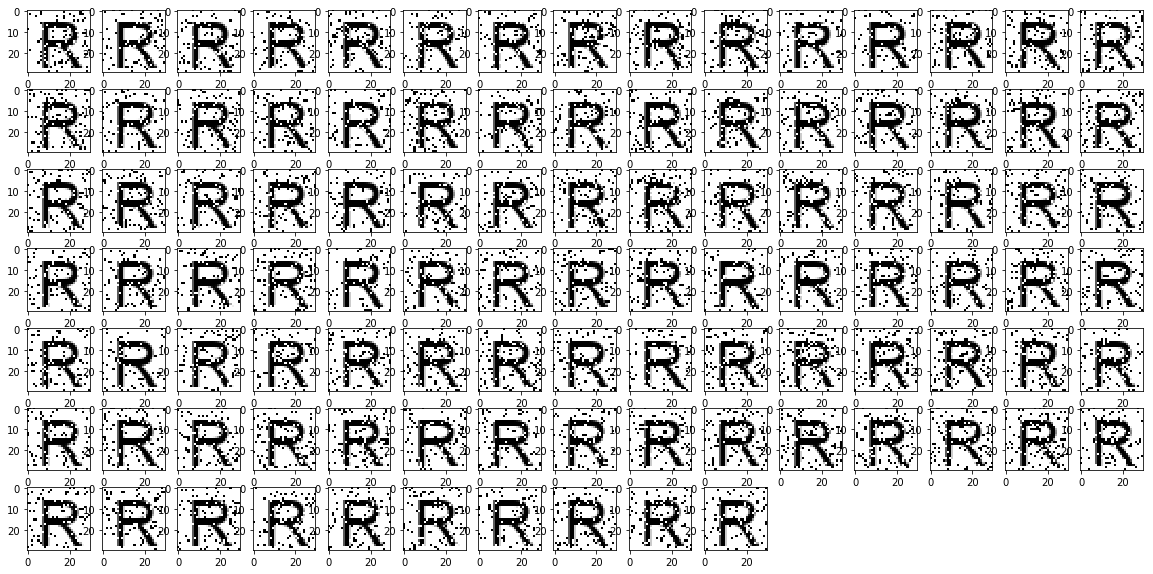

Training for label S...


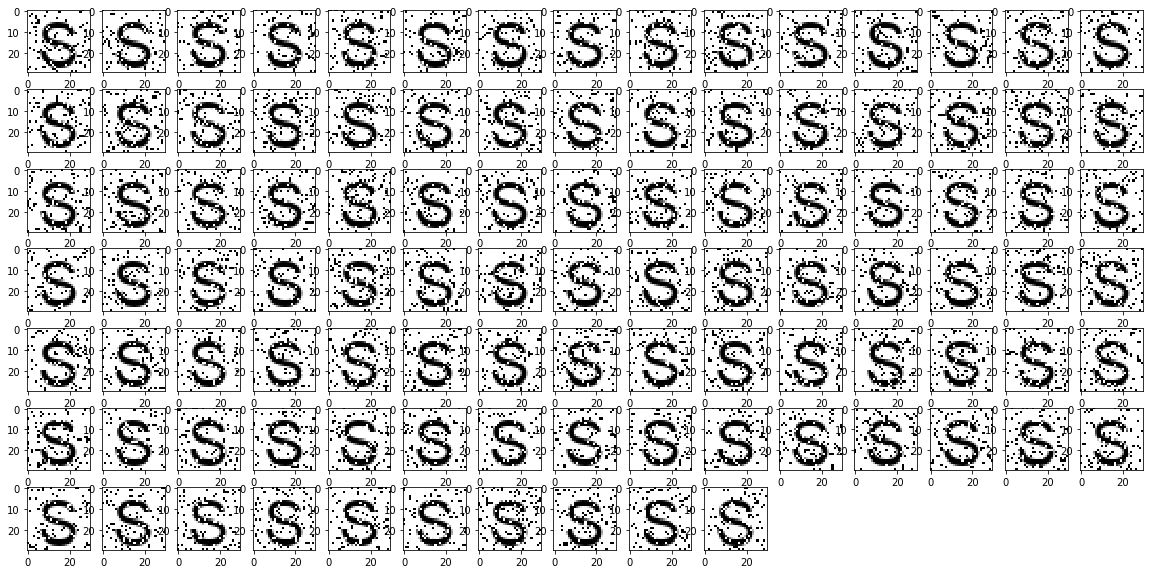

Training for label T...


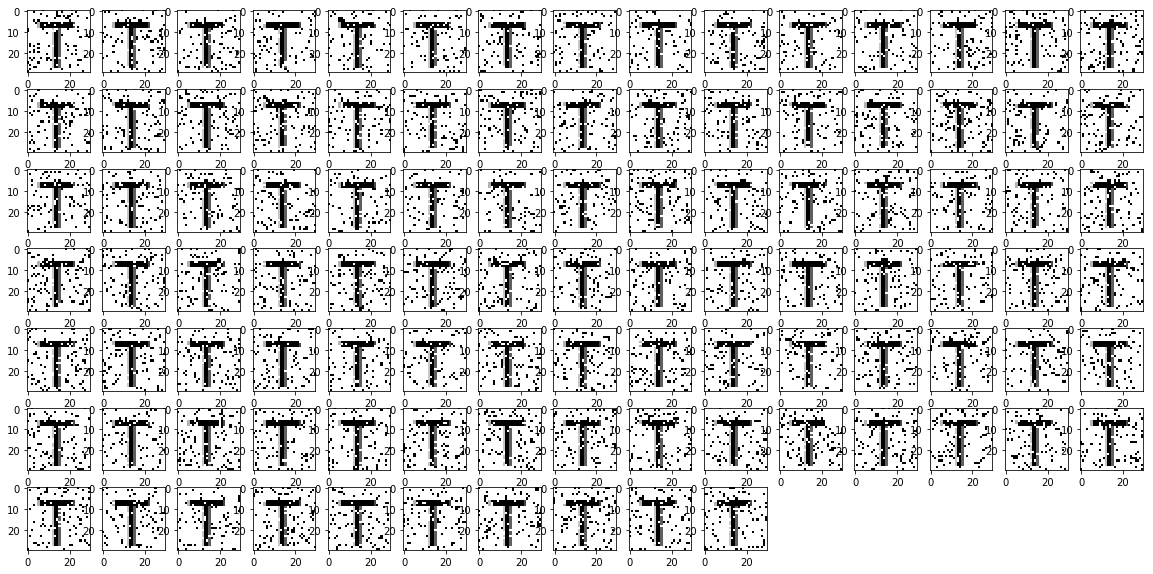

Training for label U...


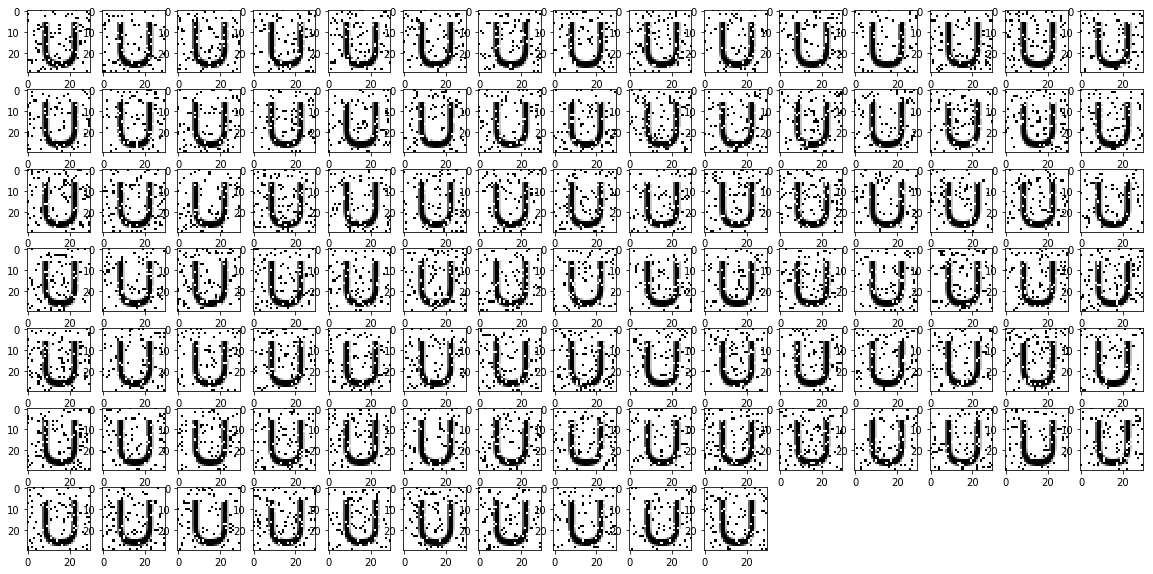

Training for label V...


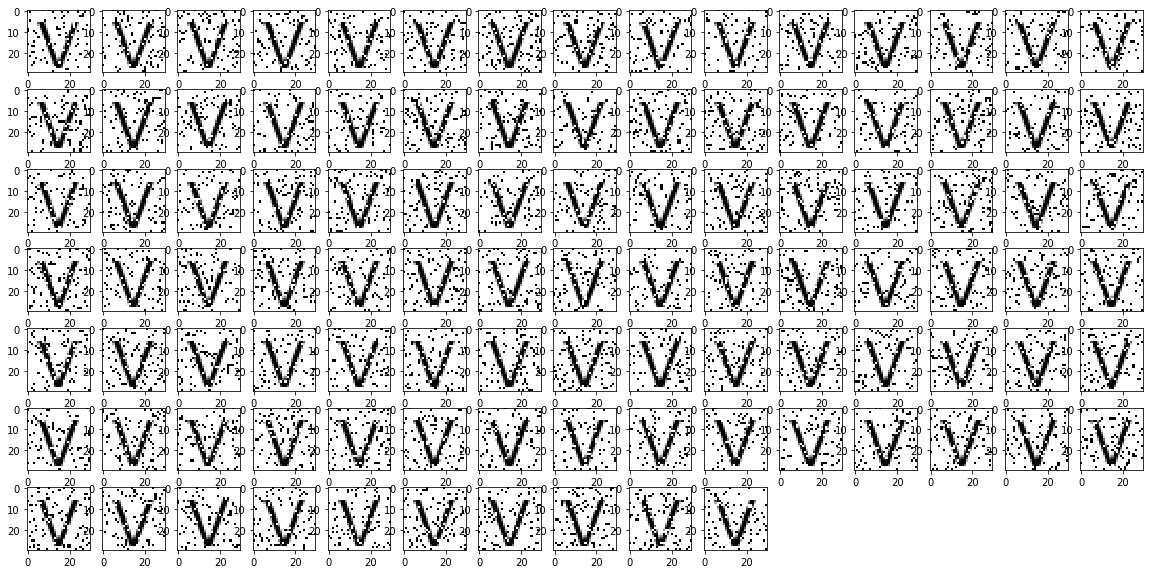

Training for label W...


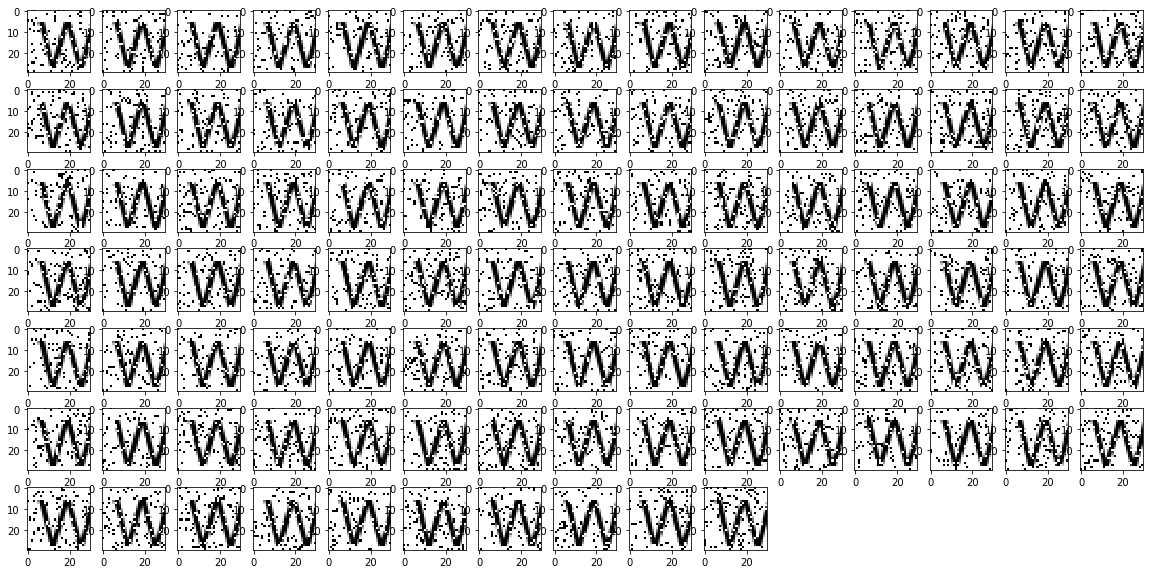

Training for label X...


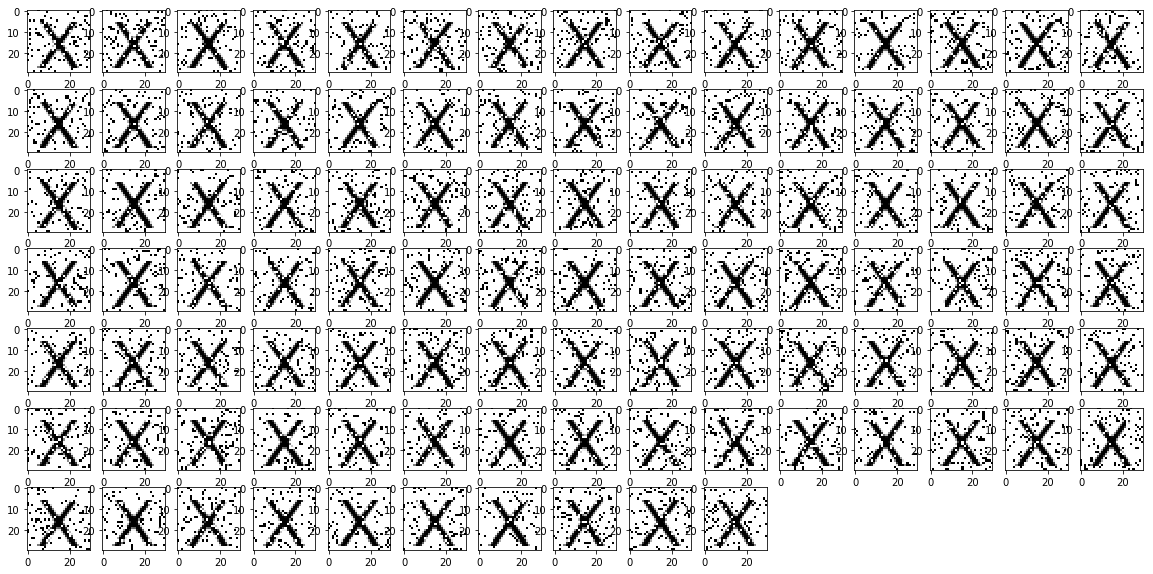

Training for label Y...


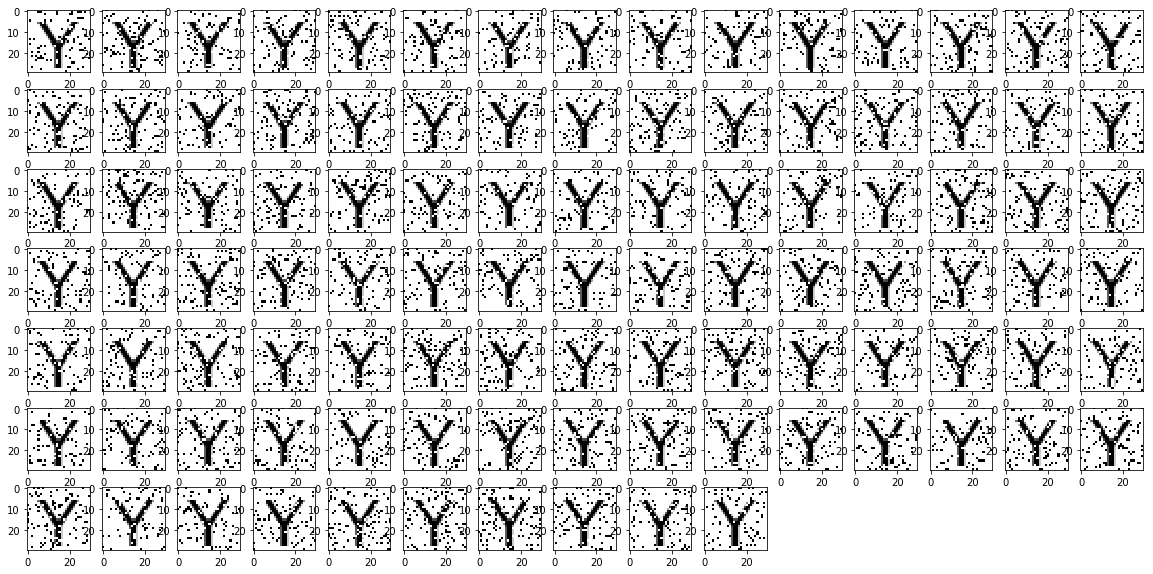

Training for label Z...


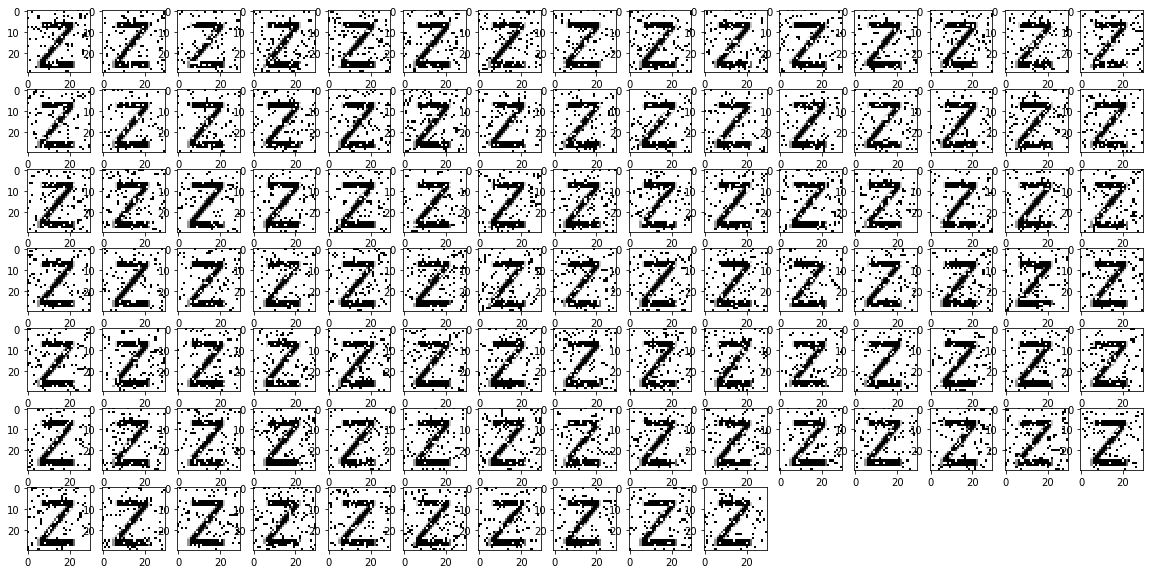

Training for label a...


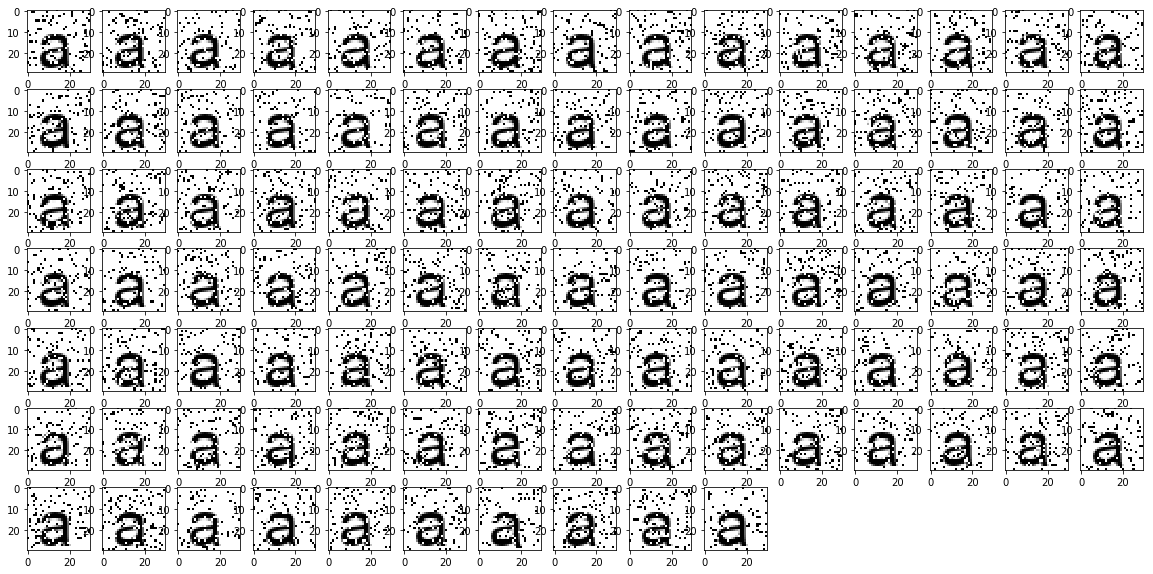

Training for label b...


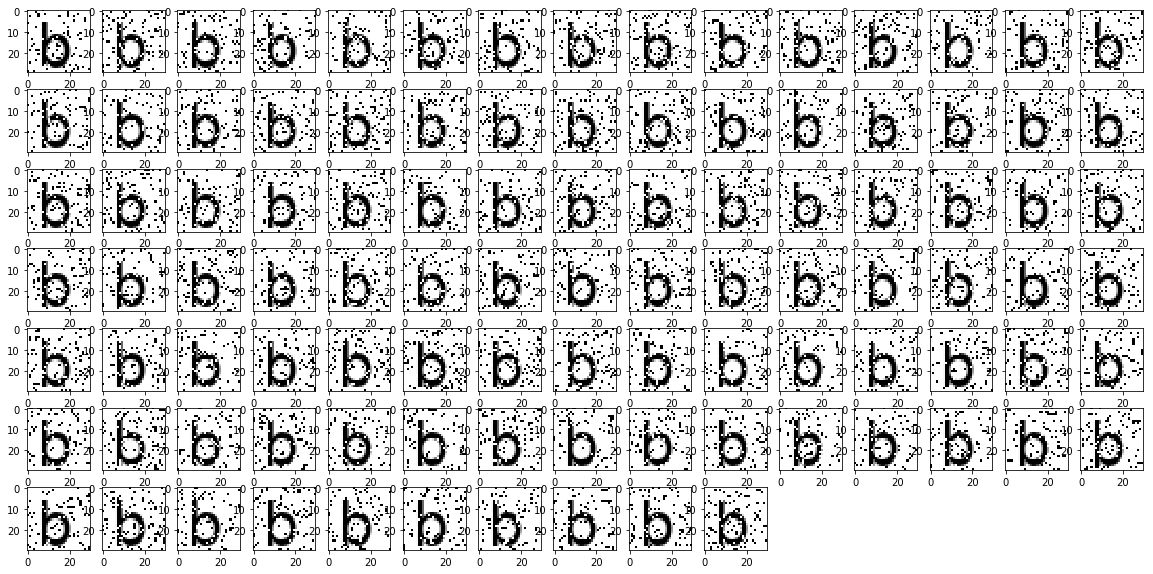

Training for label c...


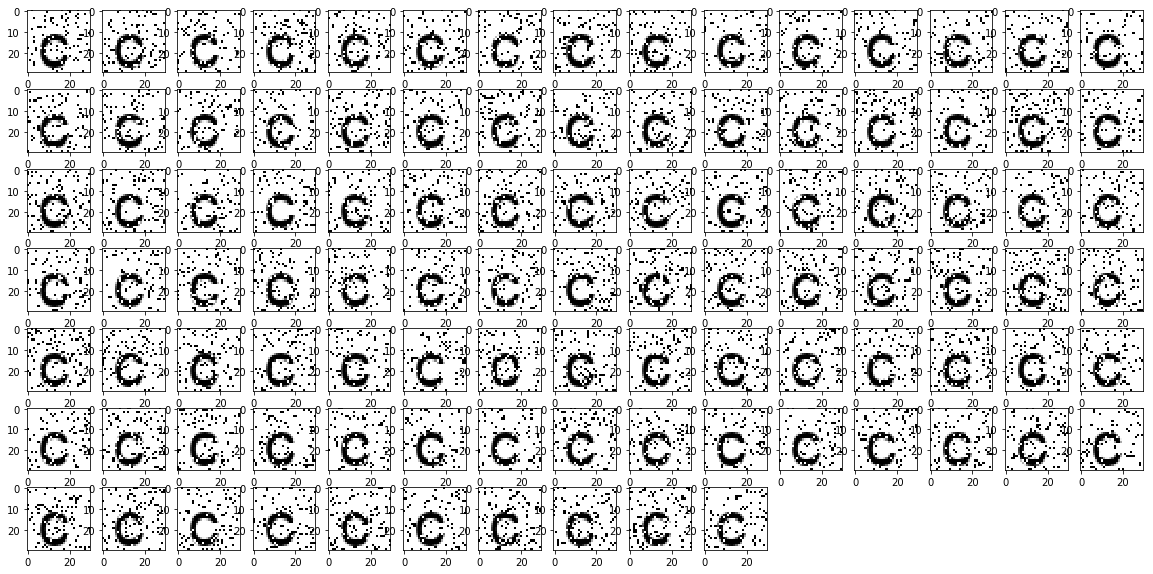

Training for label d...


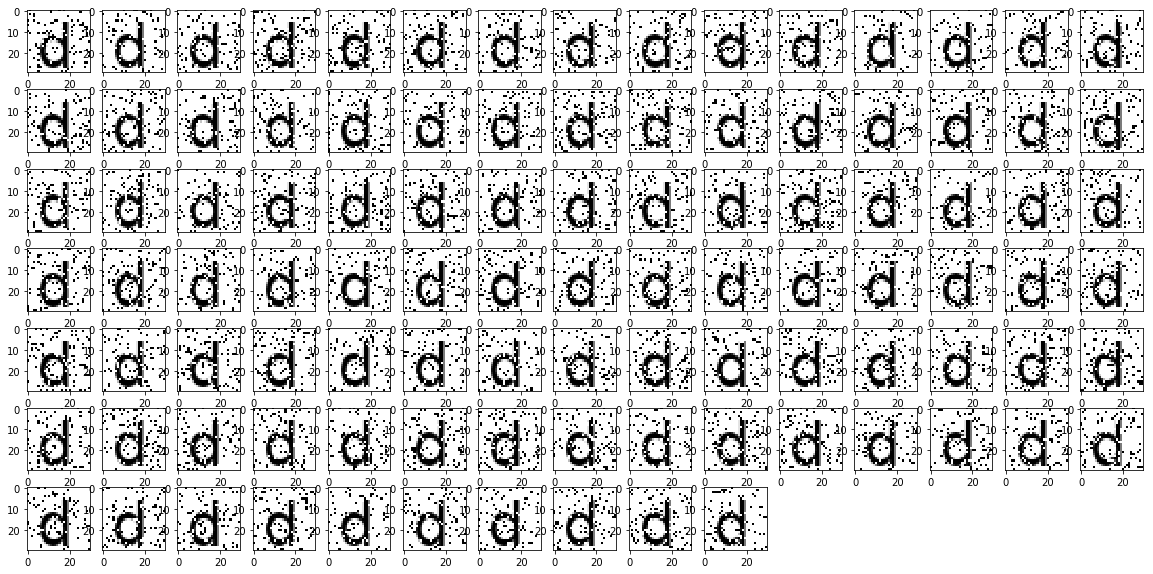

Training for label e...


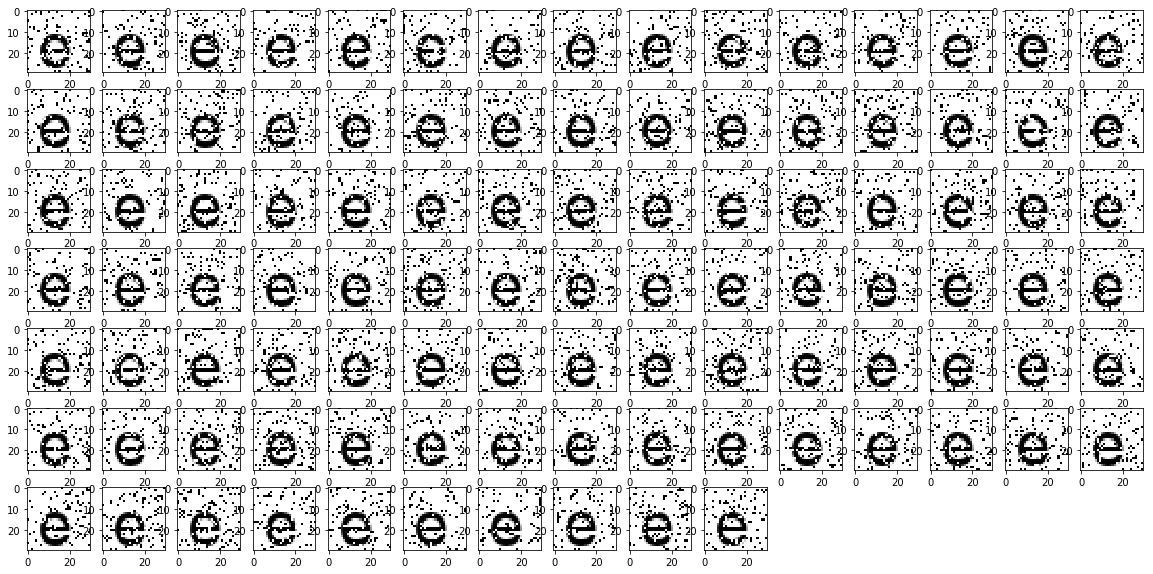

Training for label f...


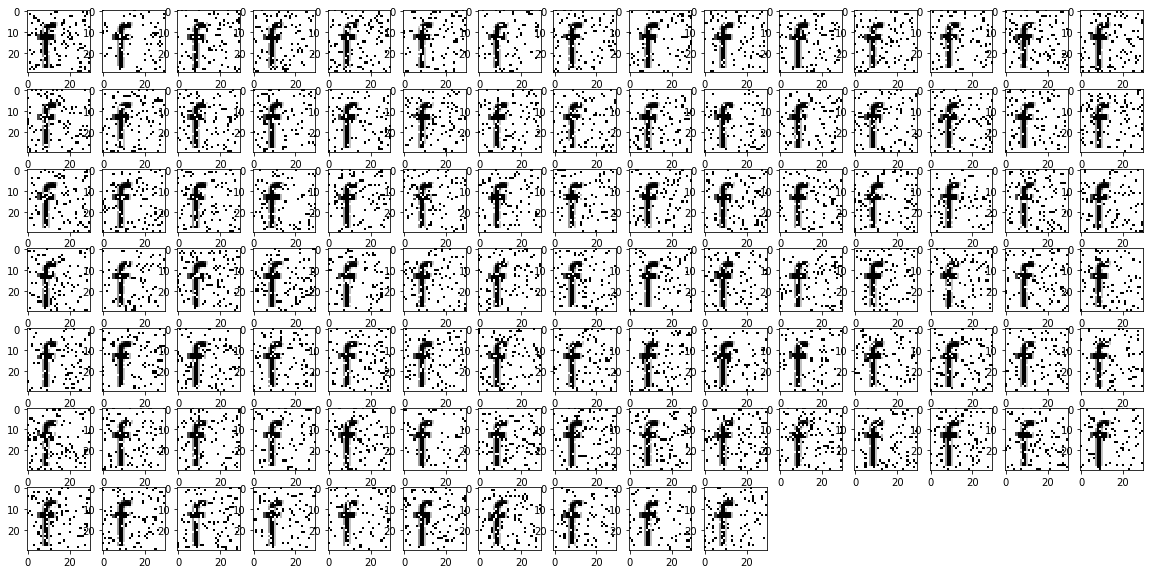

Training for label g...


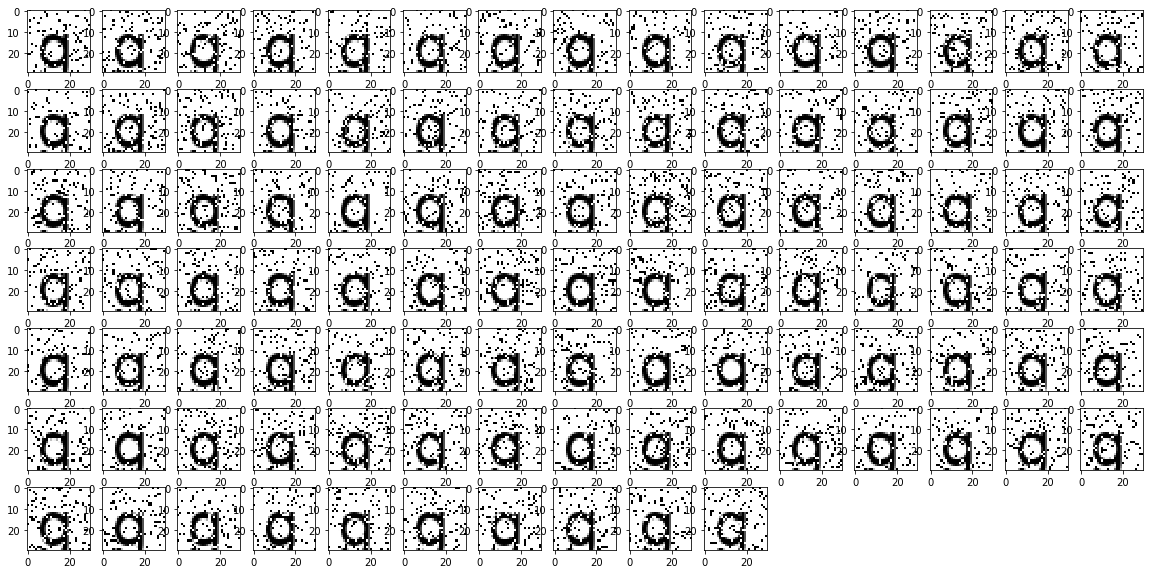

Training for label h...


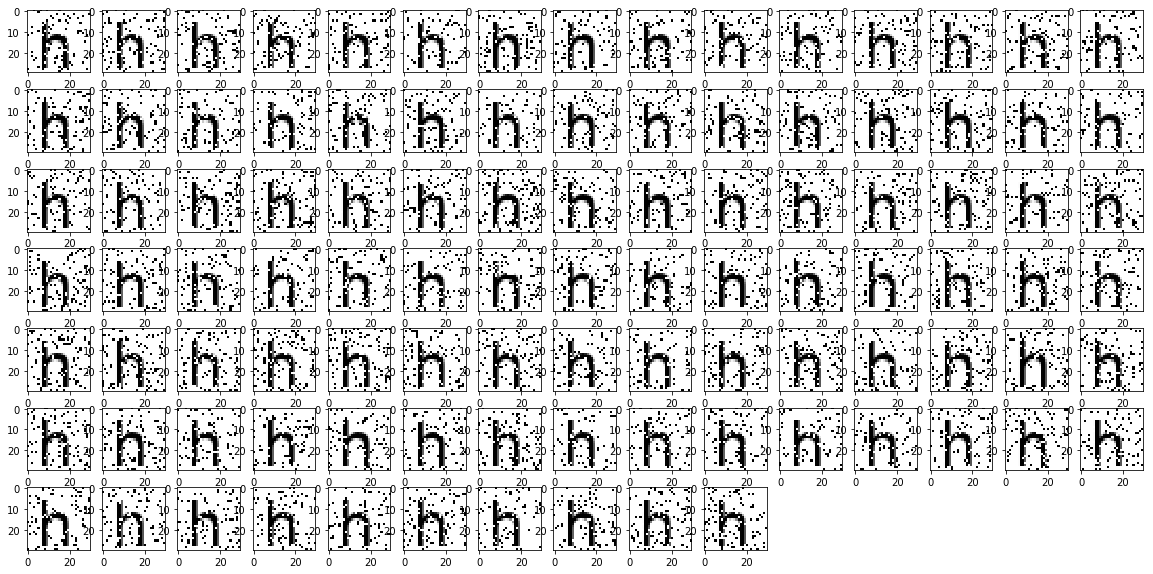

Training for label i...


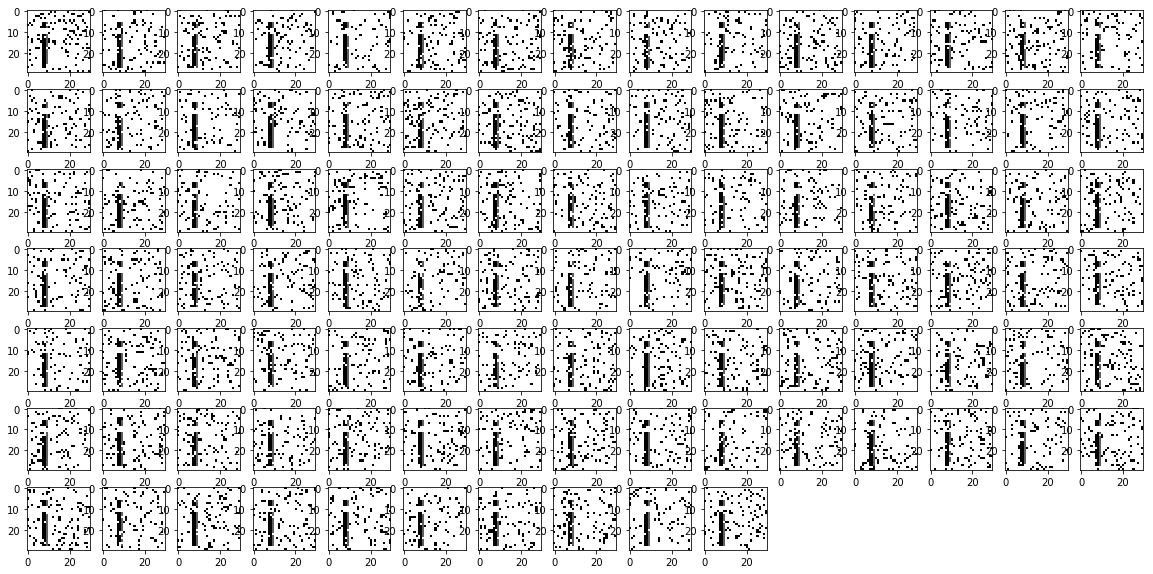

Training for label j...


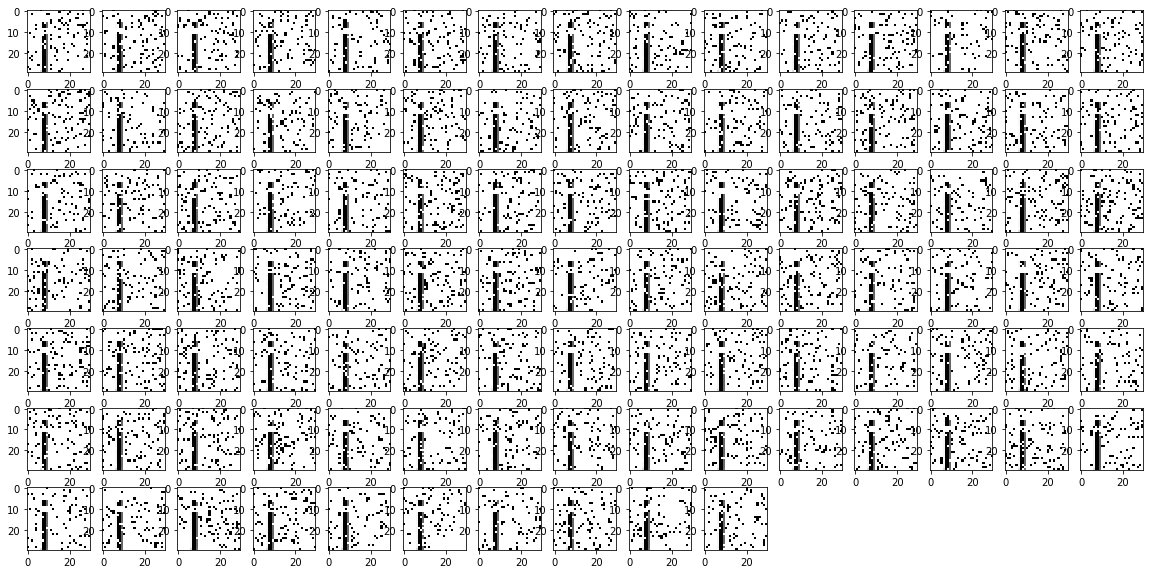

Training for label k...


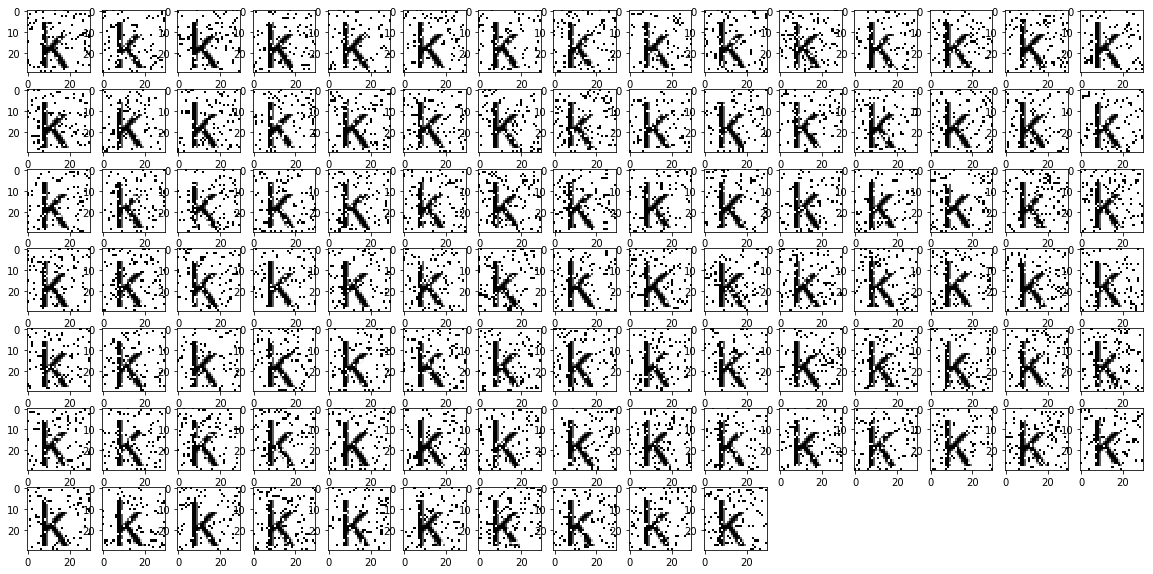

Training for label l...


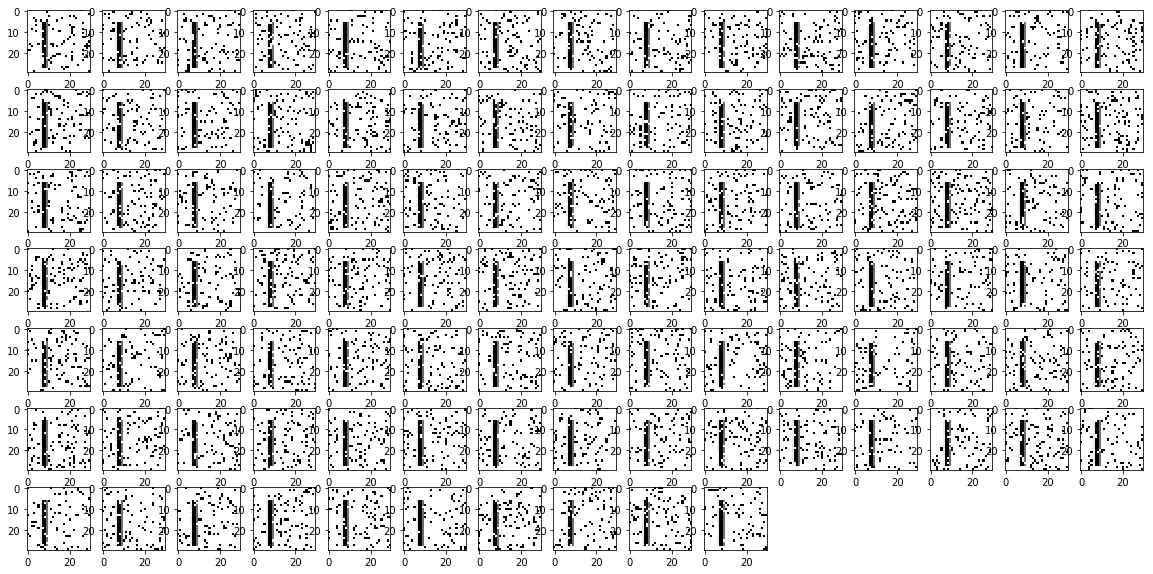

Training for label m...


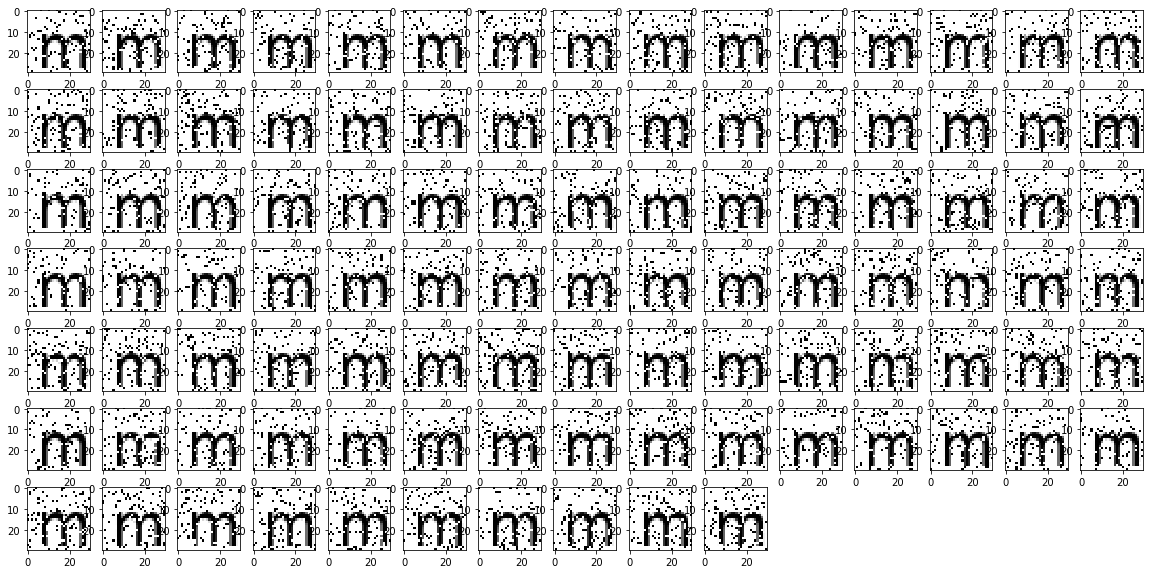

Training for label n...


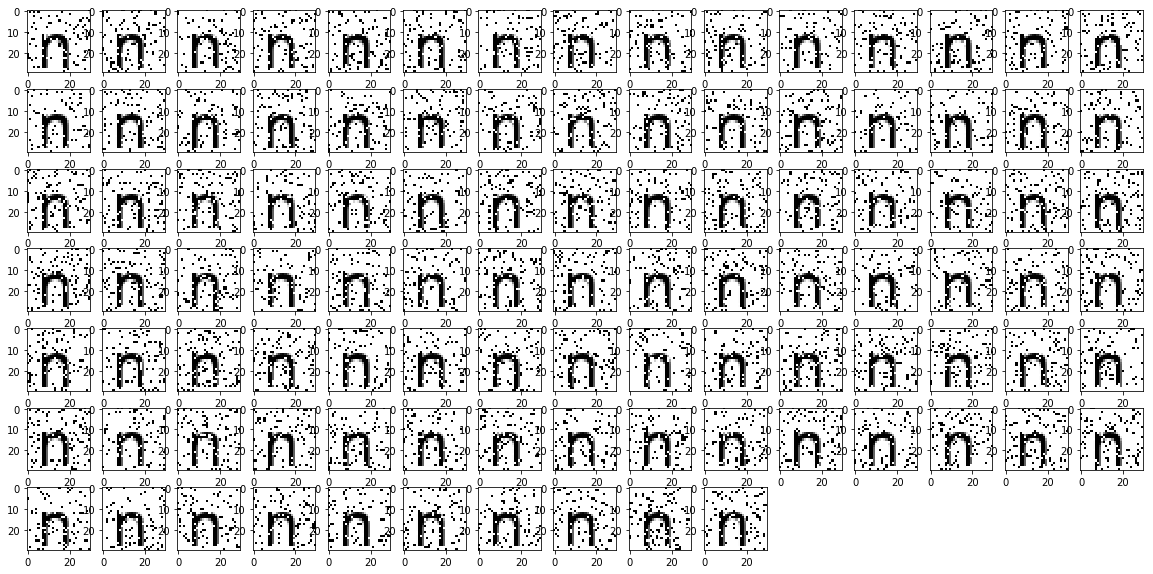

Training for label o...


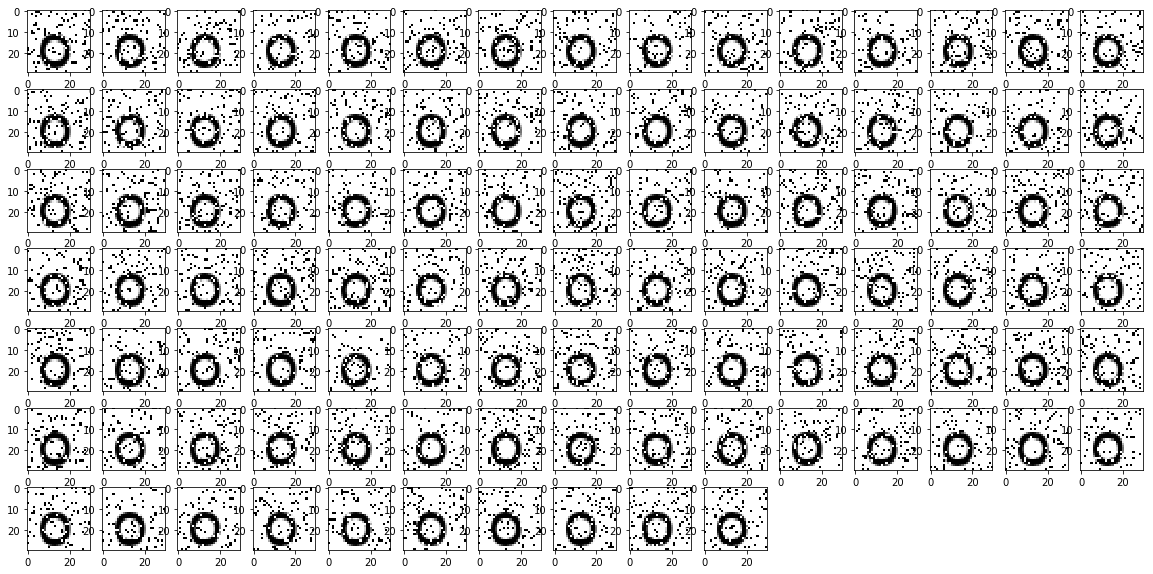

Training for label p...


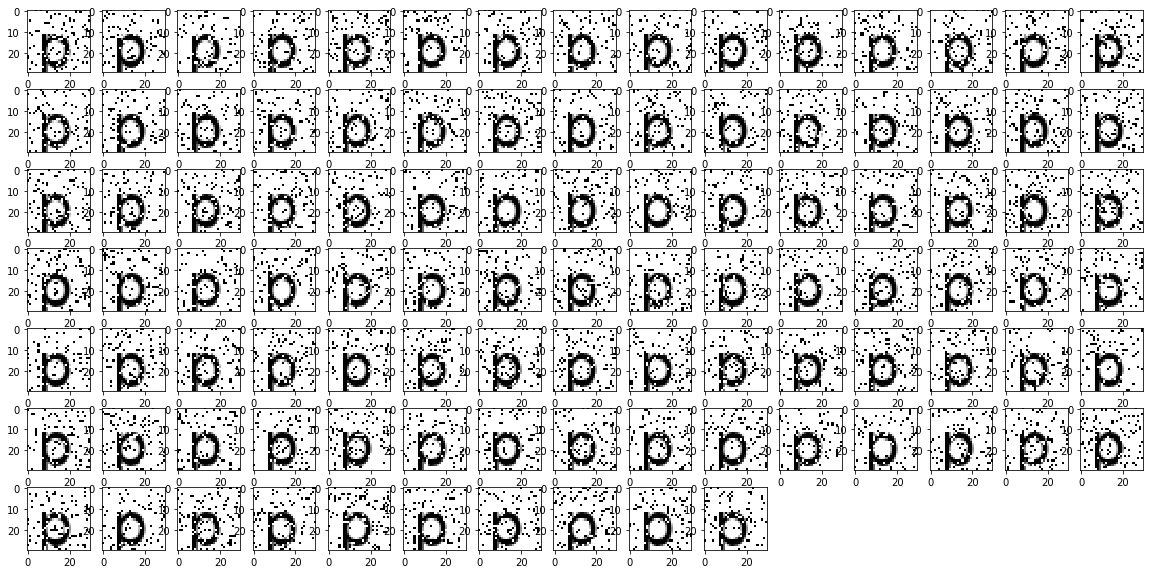

Training for label q...


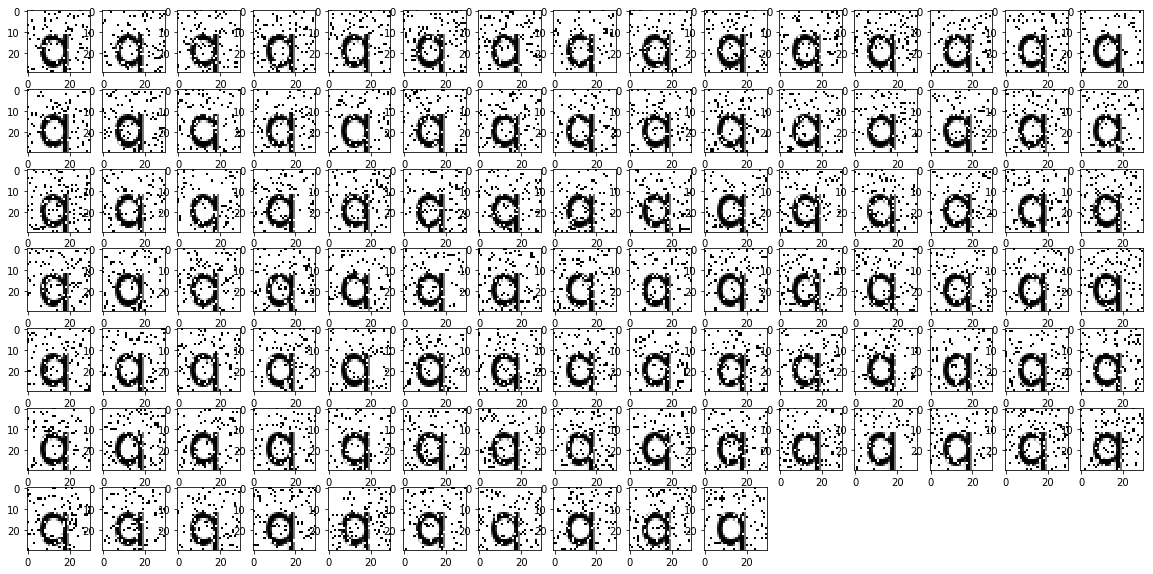

Training for label r...


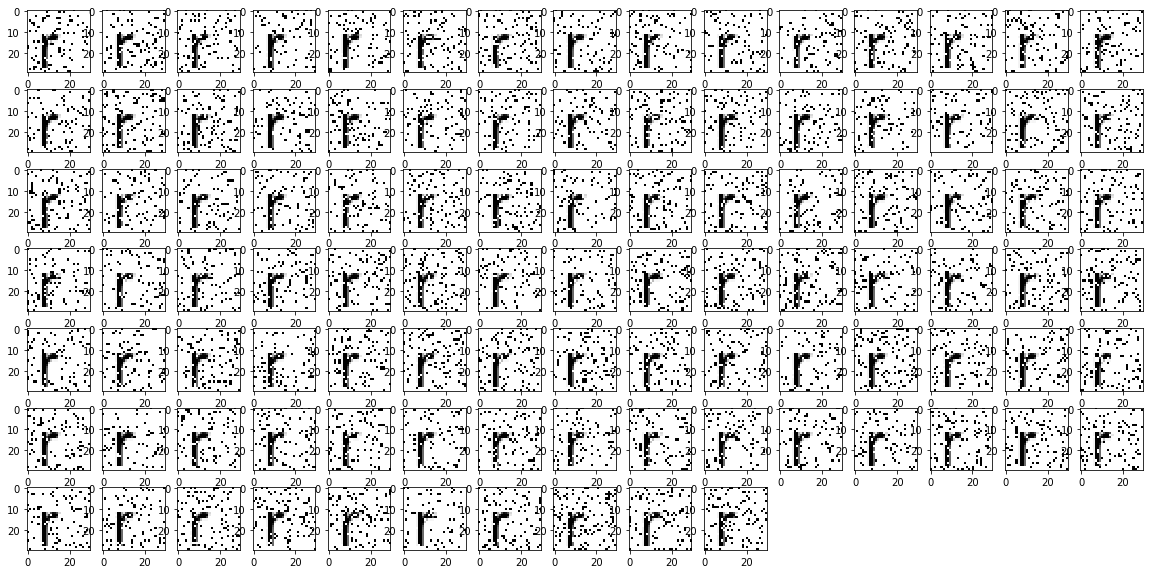

Training for label s...


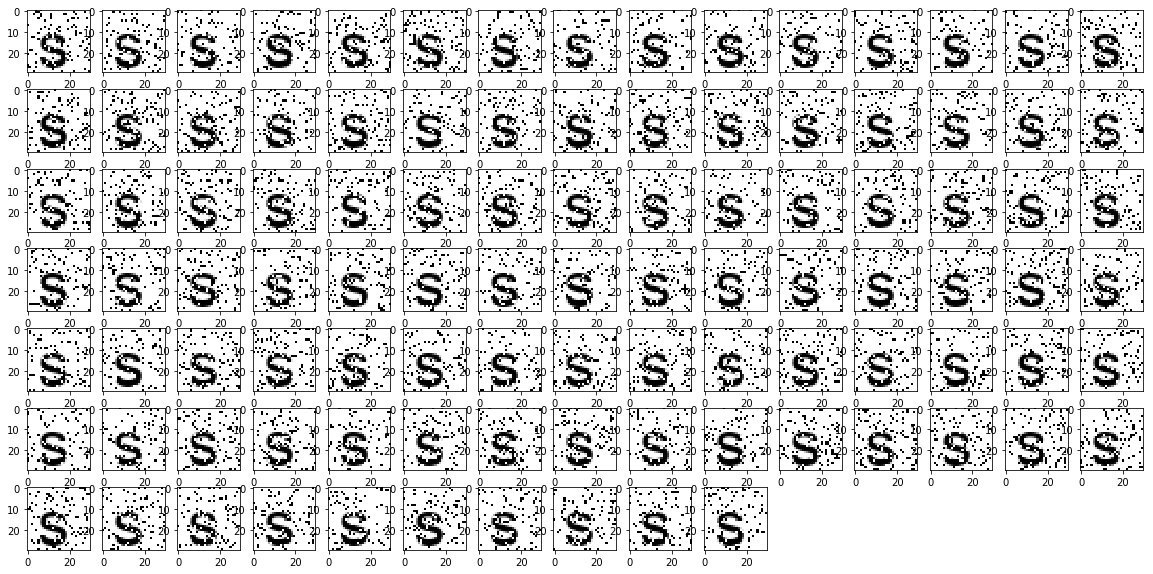

Training for label t...


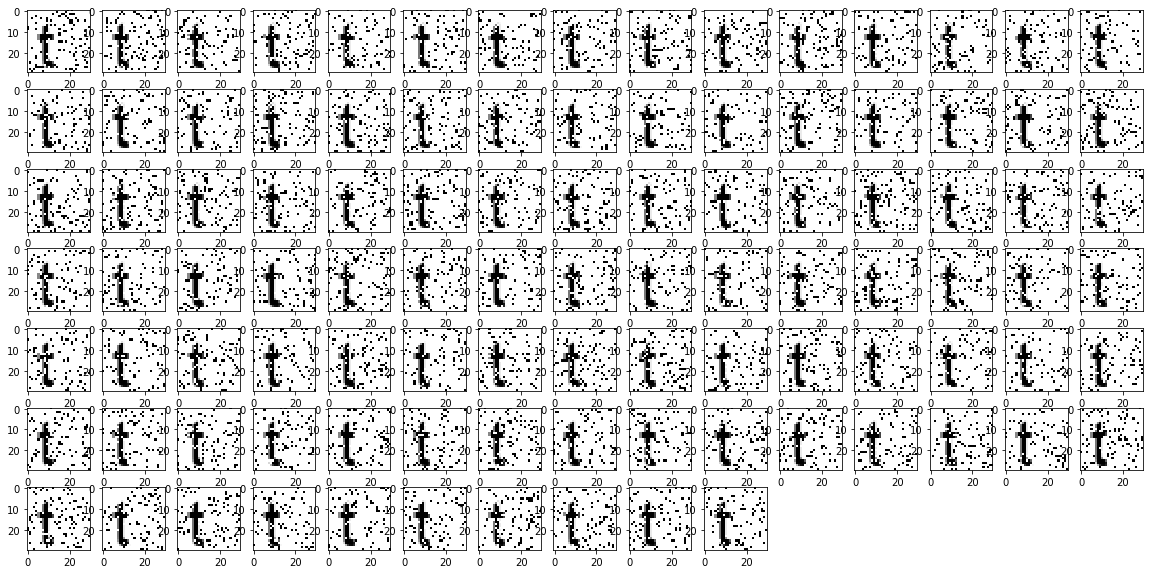

Training for label u...


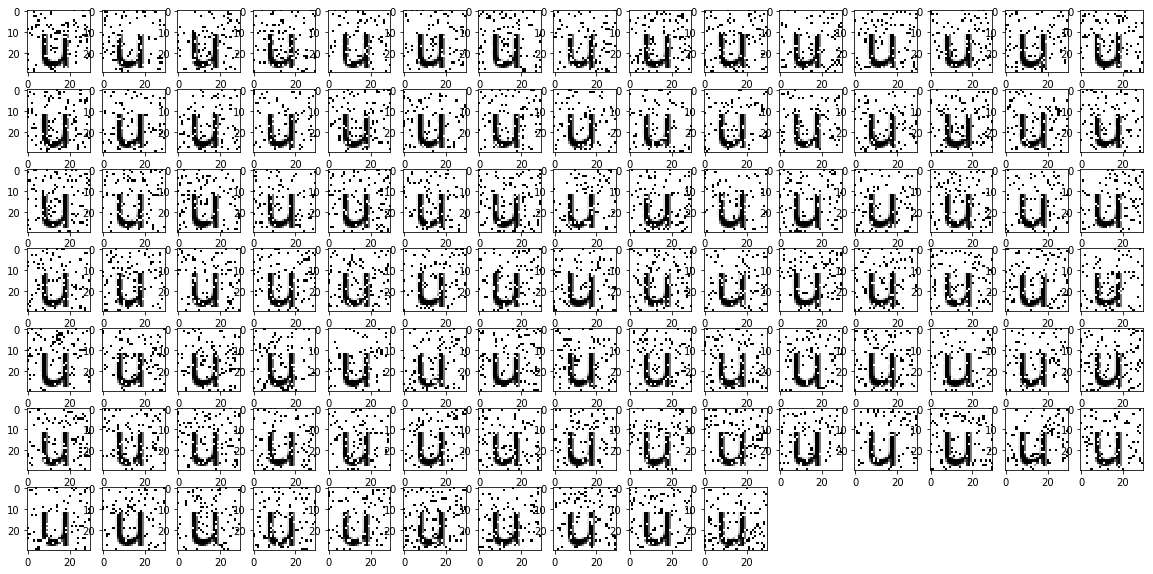

Training for label v...


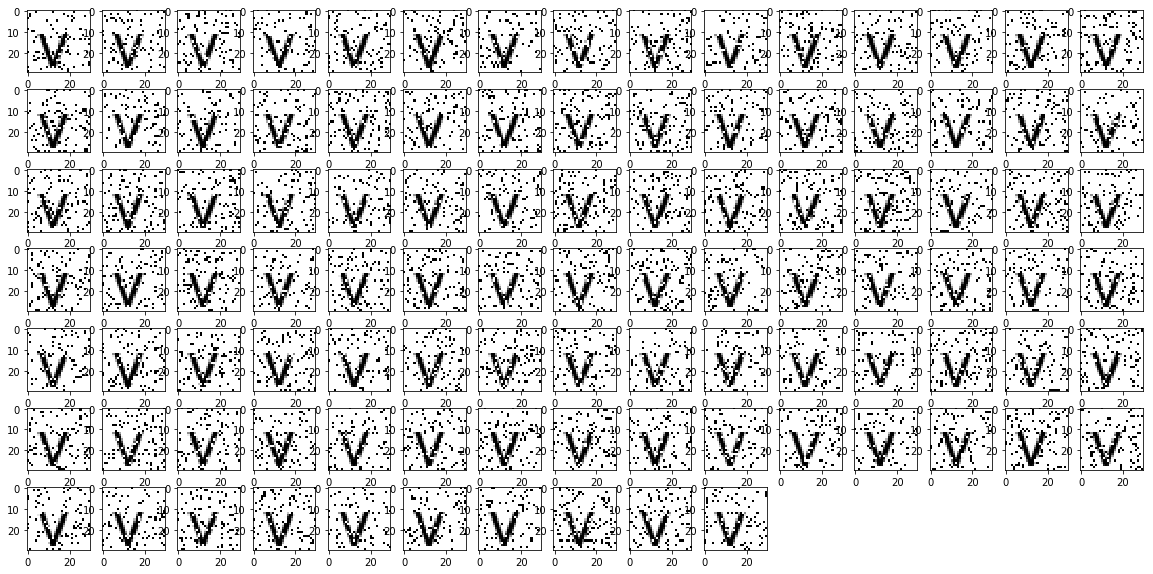

Training for label w...


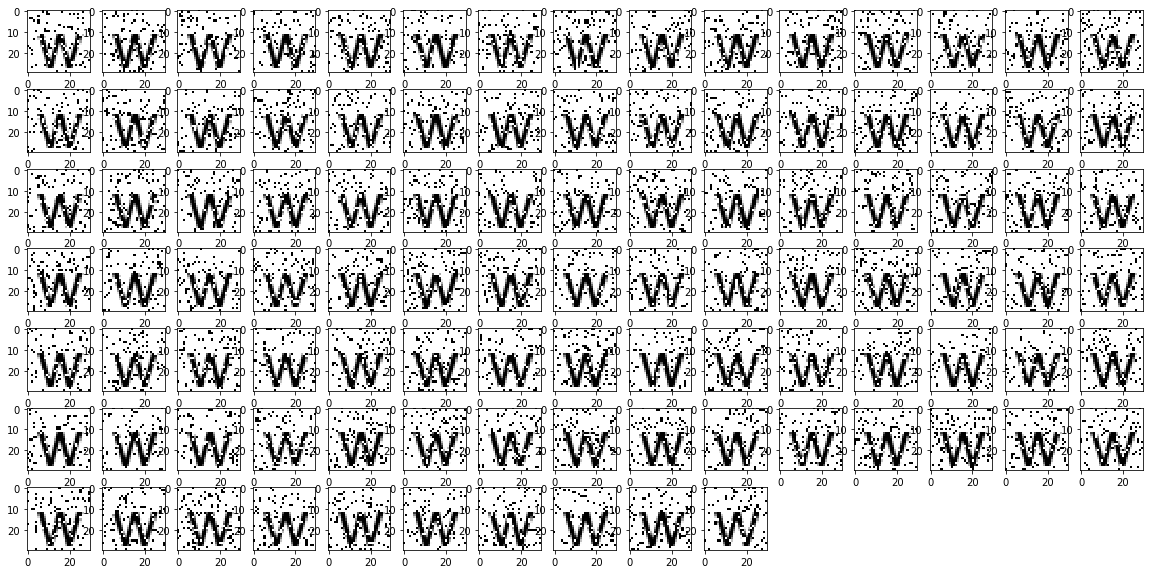

Training for label x...


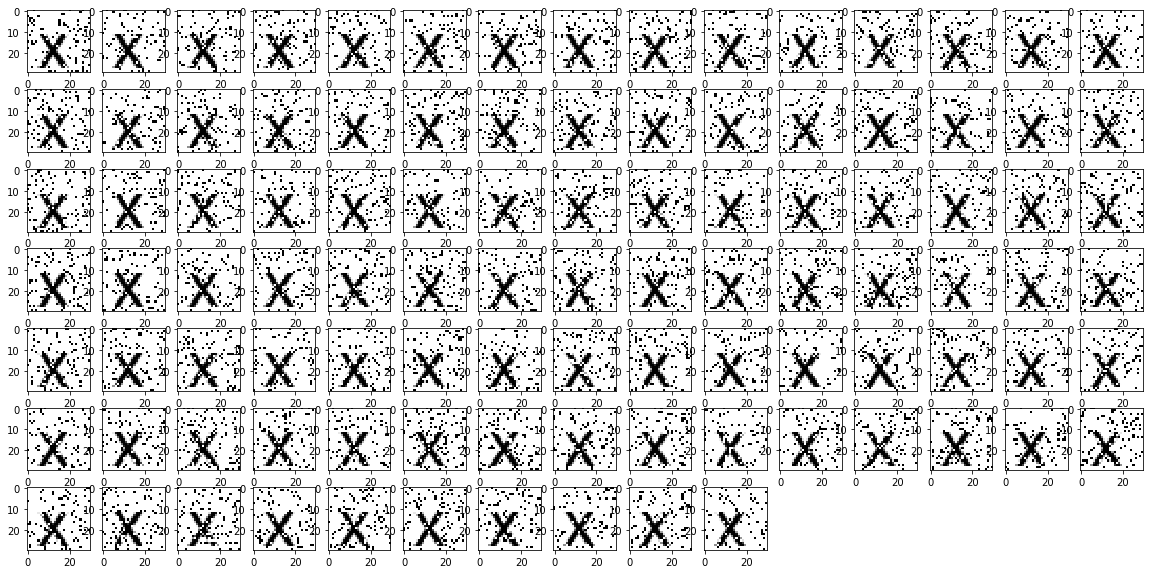

Training for label y...


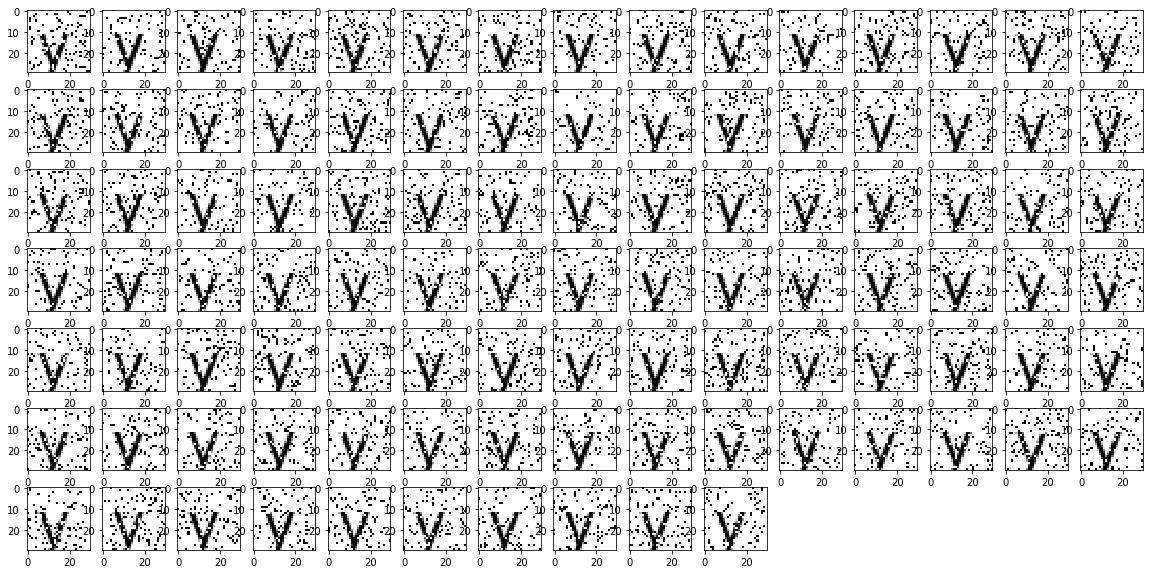

Training for label z...


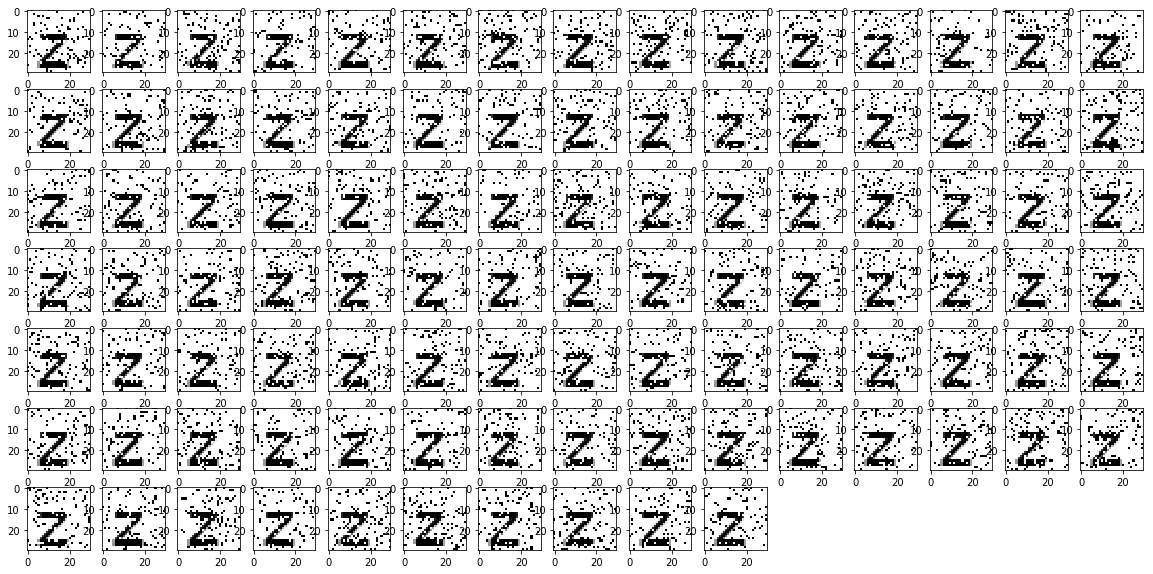

Training for label 0...


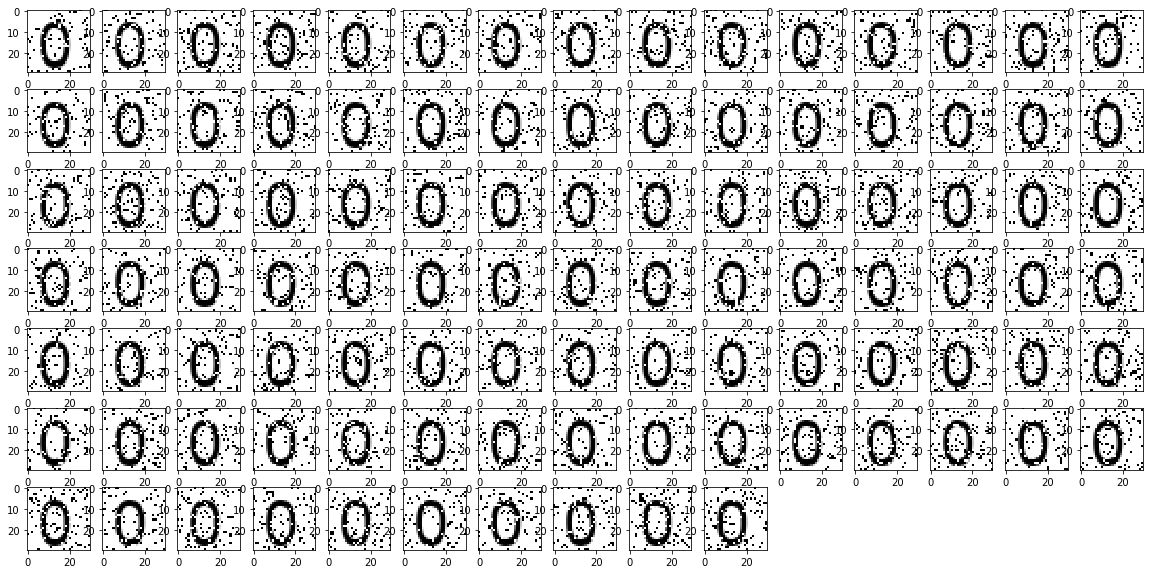

Training for label 1...


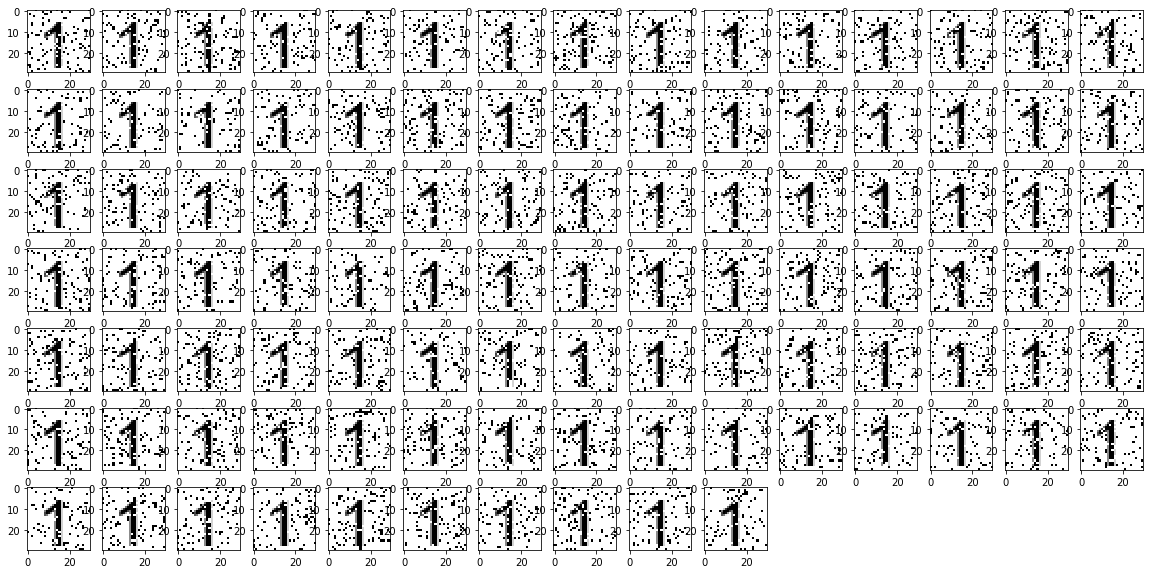

Training for label 2...


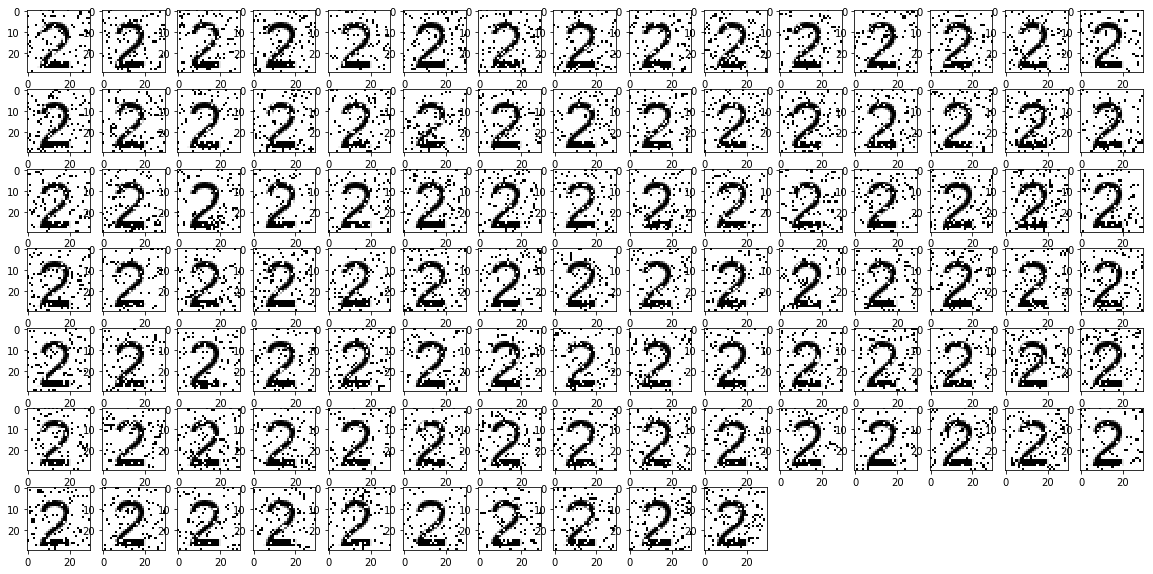

Training for label 3...


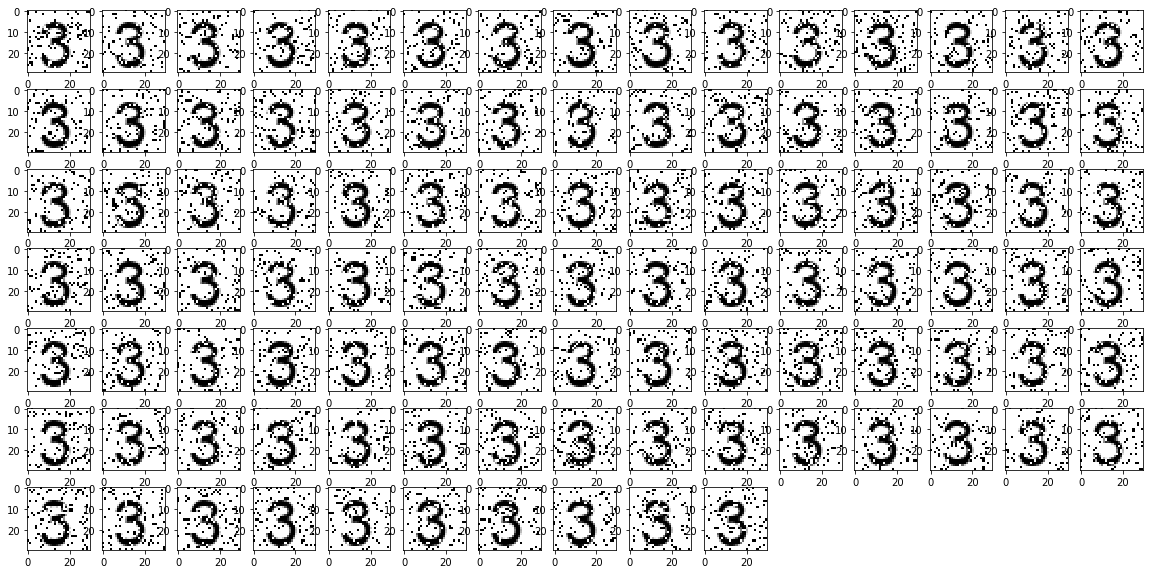

Training for label 4...


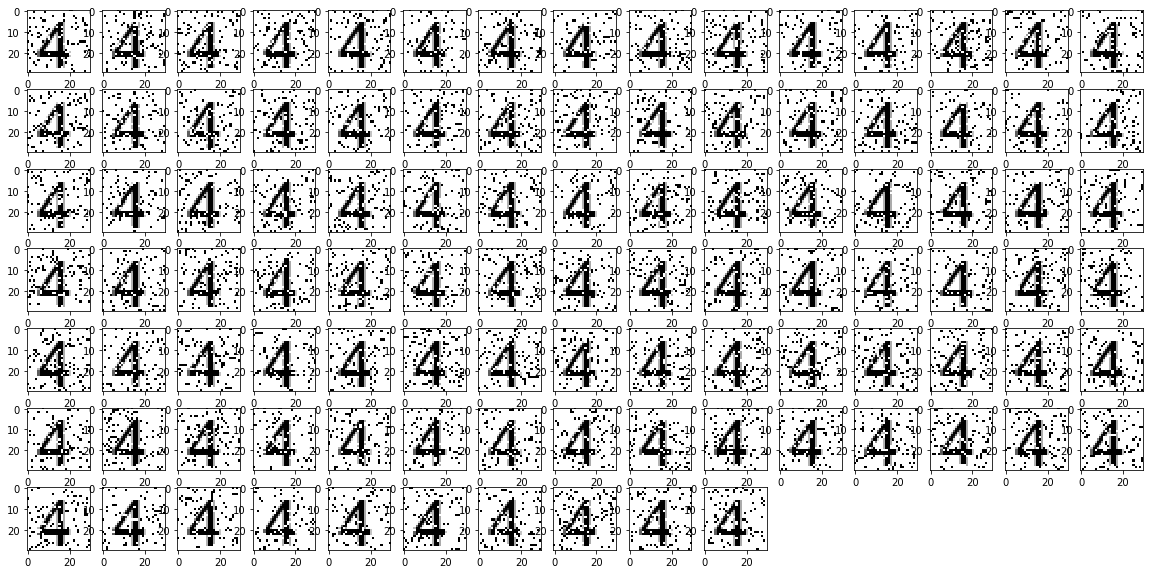

Training for label 5...


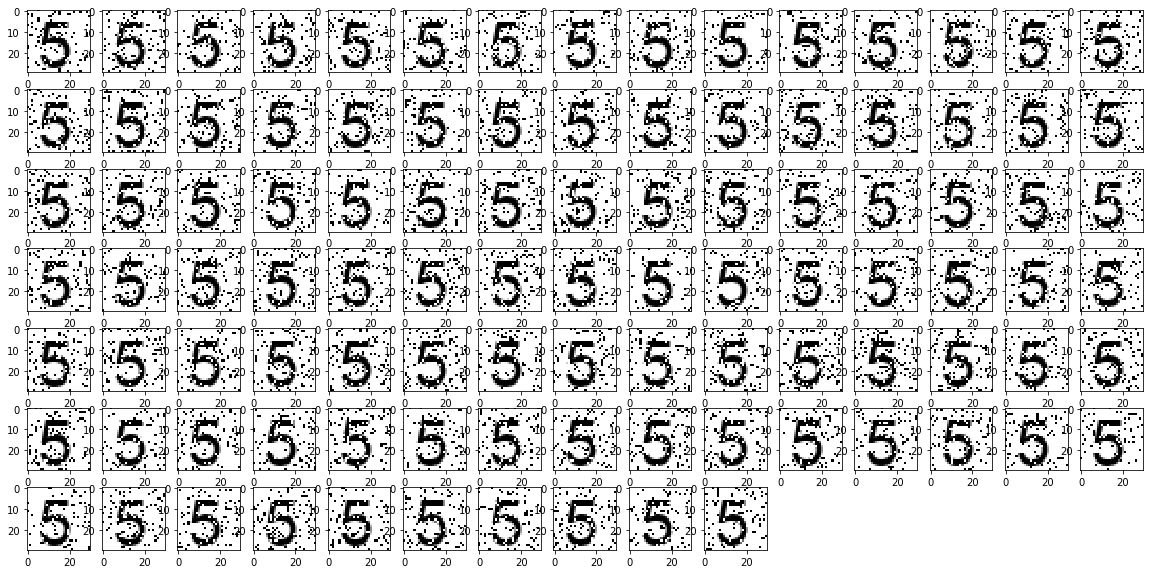

Training for label 6...


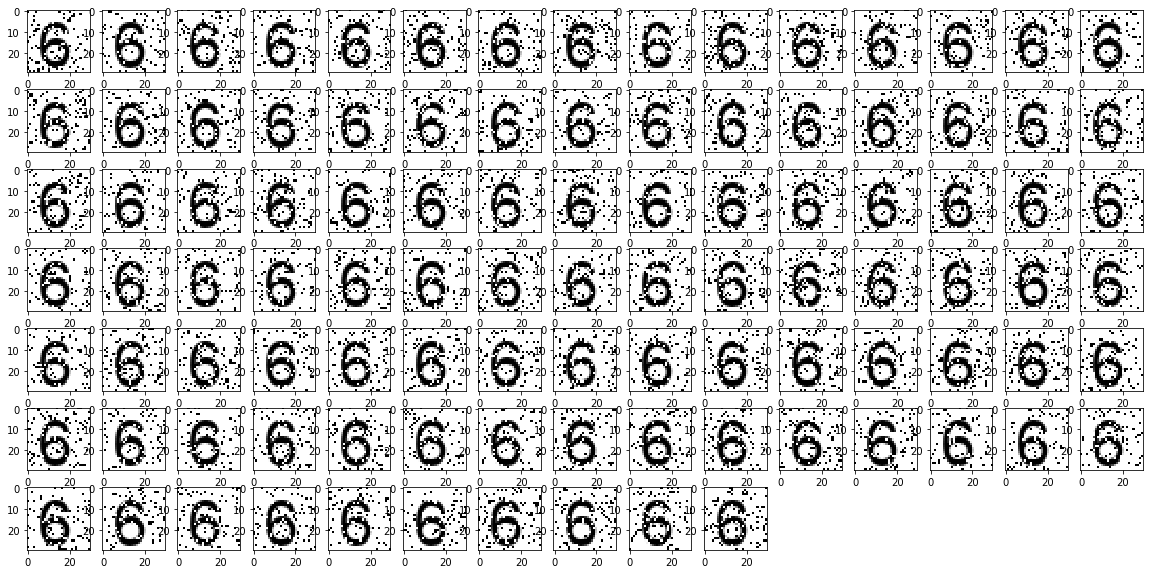

Training for label 7...


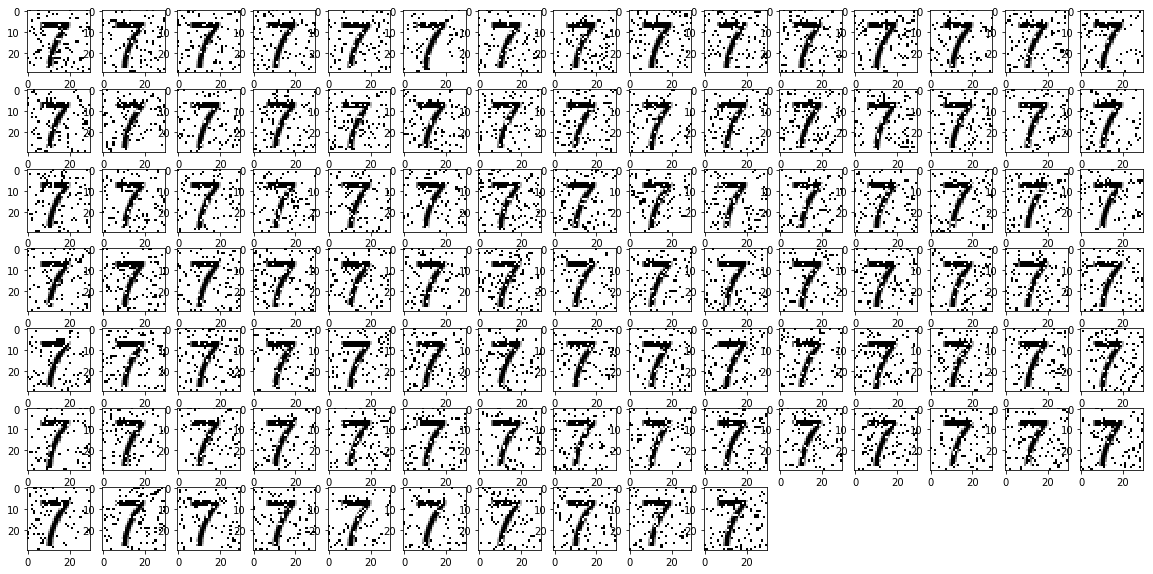

Training for label 8...


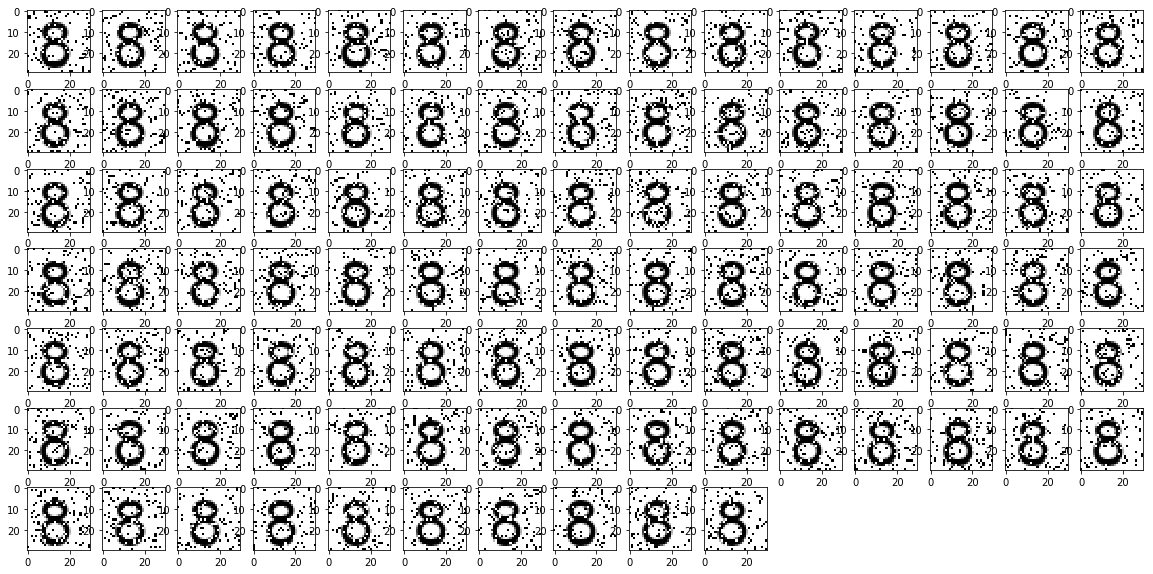

Training for label 9...


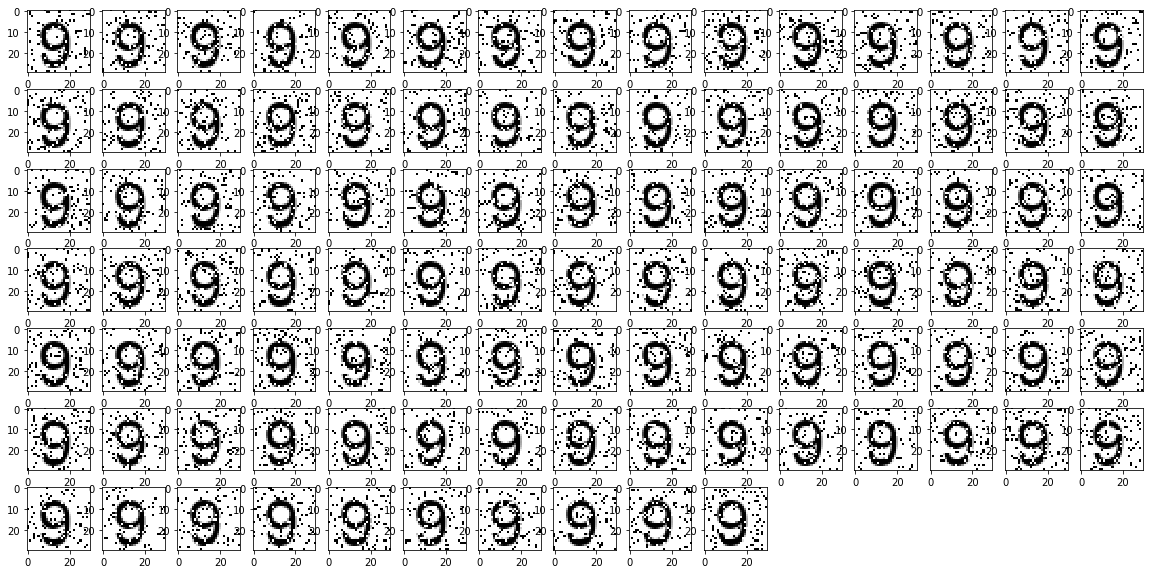

In [14]:
for x in labels:
    print 'Training for label {}...'.format(x)
    fill_memory(x, label_to_bs[x])

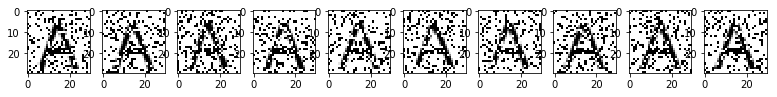

!! A correct=10 wrong= 0 answers=['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


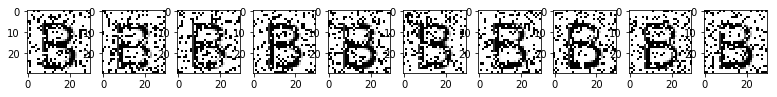

!! B correct=10 wrong= 0 answers=['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


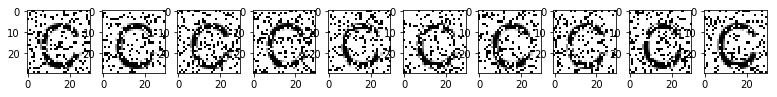

!! C correct= 8 wrong= 2 answers=['C', 'G', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'C']


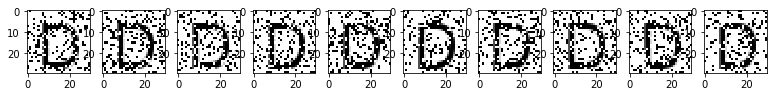

!! D correct=10 wrong= 0 answers=['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


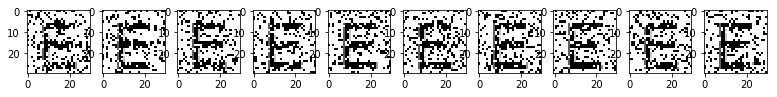

!! E correct= 8 wrong= 2 answers=['E', 'E', 'E', 'E', 'E', 'S', 'E', 'E', 'S', 'E']


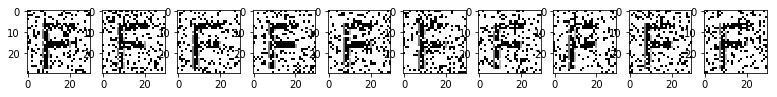

!! F correct= 6 wrong= 4 answers=['R', 'S', 'F', 'F', 'F', 'F', 'i', 'F', 'F', 'R']


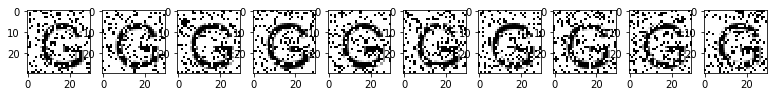

!! G correct=10 wrong= 0 answers=['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G']


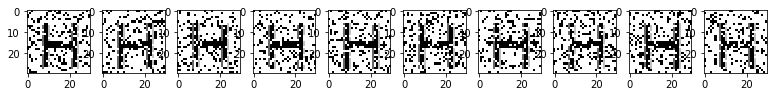

!! H correct=10 wrong= 0 answers=['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


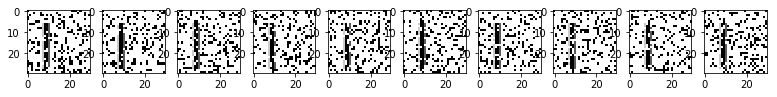

!! I correct= 7 wrong= 3 answers=['I', 'I', 'I', 'i', 'i', 'I', 'I', 'i', 'I', 'I']


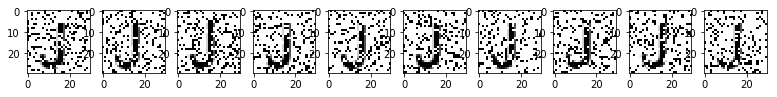

!! J correct=10 wrong= 0 answers=['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']


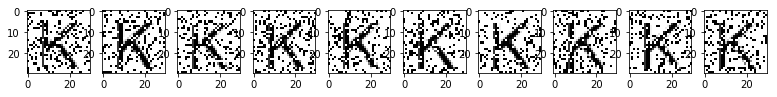

!! K correct=10 wrong= 0 answers=['K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K']


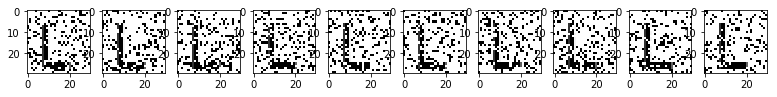

!! L correct= 0 wrong=10 answers=['i', 'i', 'i', 'i', 't', 'i', 'i', 'i', 'I', 'I']


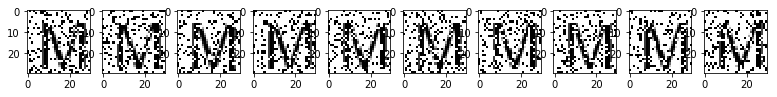

!! M correct=10 wrong= 0 answers=['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M']


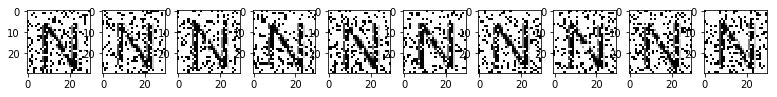

!! N correct=10 wrong= 0 answers=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


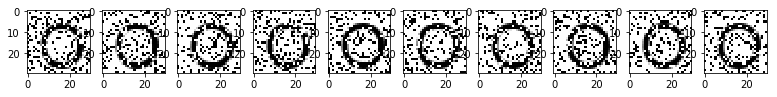

!! O correct= 1 wrong= 9 answers=['G', 'Q', 'O', 'G', 'Q', 'G', 'G', 'G', 'G', 'Q']


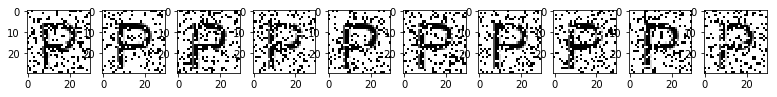

!! P correct=10 wrong= 0 answers=['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']


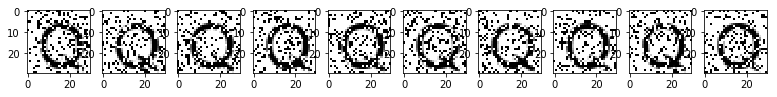

!! Q correct=10 wrong= 0 answers=['Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q']


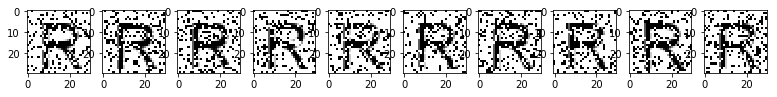

!! R correct=10 wrong= 0 answers=['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


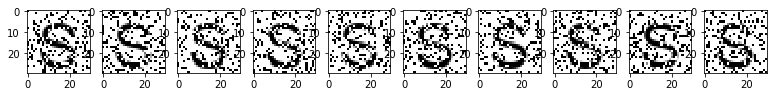

!! S correct=10 wrong= 0 answers=['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']


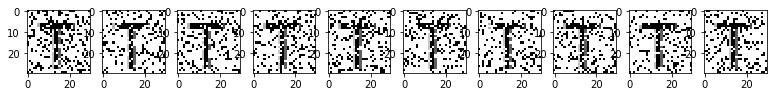

!! T correct=10 wrong= 0 answers=['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


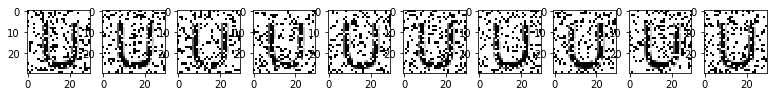

!! U correct= 9 wrong= 1 answers=['N', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U']


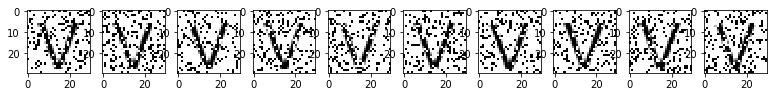

!! V correct=10 wrong= 0 answers=['V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V']


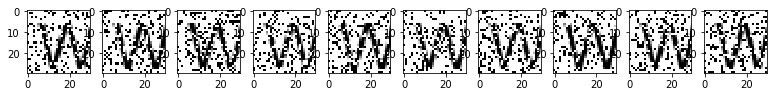

!! W correct=10 wrong= 0 answers=['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


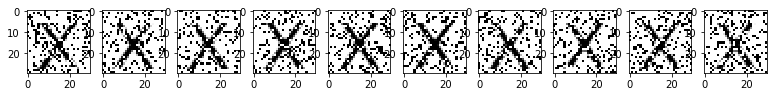

!! X correct=10 wrong= 0 answers=['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']


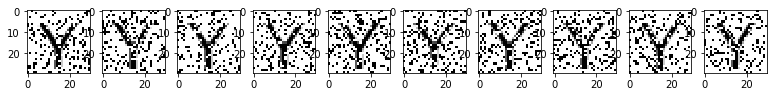

!! Y correct=10 wrong= 0 answers=['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']


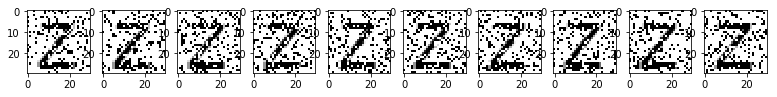

!! Z correct=10 wrong= 0 answers=['Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z']


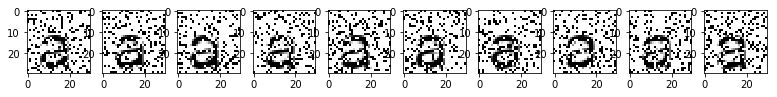

!! a correct= 9 wrong= 1 answers=['a', 'a', 'a', 'a', 'd', 'a', 'a', 'a', 'a', 'a']


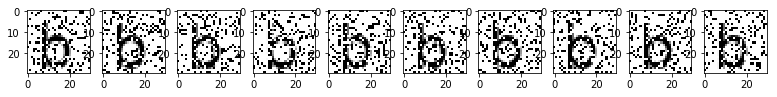

!! b correct=10 wrong= 0 answers=['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


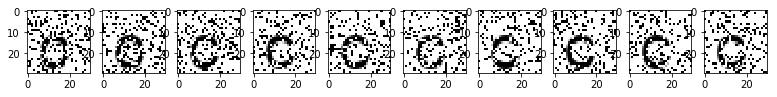

!! c correct=10 wrong= 0 answers=['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']


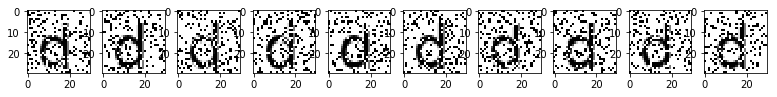

!! d correct=10 wrong= 0 answers=['d', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd']


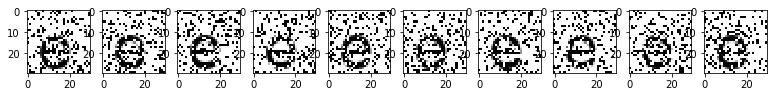

!! e correct= 0 wrong=10 answers=['c', 'c', 'd', 'c', 'd', 'd', 'c', 'd', 'd', 'd']


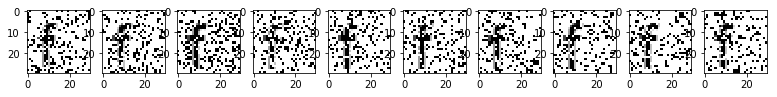

!! f correct= 6 wrong= 4 answers=['f', 'f', 'f', 'i', 'f', 'f', 't', 't', 'f', 'I']


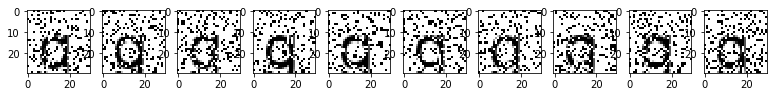

!! g correct= 4 wrong= 6 answers=['g', 'd', 'q', 'q', 'q', 'g', 'q', 'q', 'g', 'g']


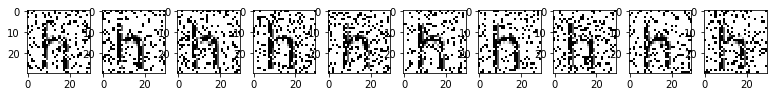

!! h correct=10 wrong= 0 answers=['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']


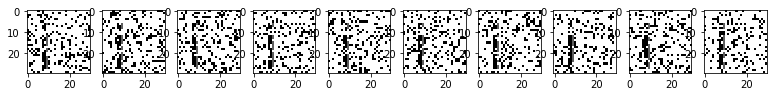

!! i correct=10 wrong= 0 answers=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i']


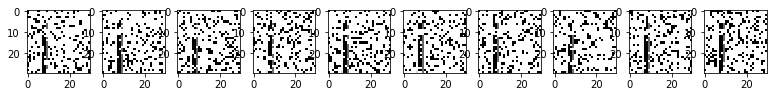

!! j correct= 1 wrong= 9 answers=['i', 'i', 'l', 'i', 'j', 'i', 'i', 'i', 'i', 'i']


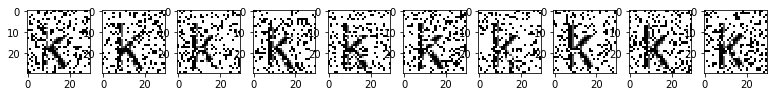

!! k correct= 5 wrong= 5 answers=['k', 'k', 'I', 'k', 'i', 'i', 'i', 'k', 'k', 'w']


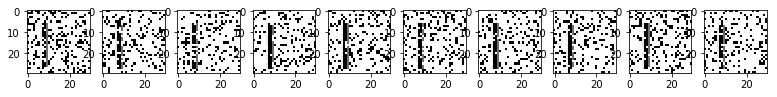

!! l correct= 7 wrong= 3 answers=['l', 'l', 'l', 'l', 'i', 'l', 'i', 'i', 'l', 'l']


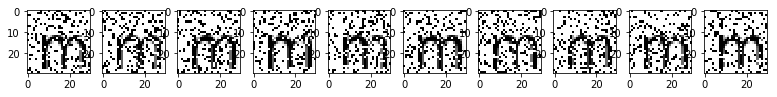

!! m correct=10 wrong= 0 answers=['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm']


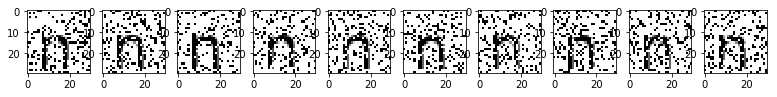

!! n correct= 6 wrong= 4 answers=['n', 'h', 'n', 'c', 'h', 'n', 'n', 'h', 'n', 'n']


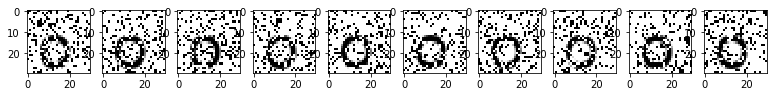

!! o correct= 0 wrong=10 answers=['c', 'c', 'd', 'c', 'q', 'd', 'c', 'd', 'd', 'c']


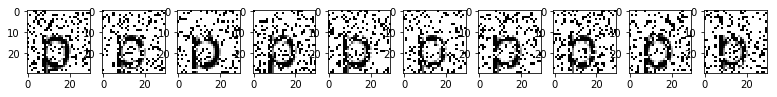

!! p correct= 1 wrong= 9 answers=['p', 'c', 'b', 'd', 'u', 'c', 'u', 'd', 'c', 'd']


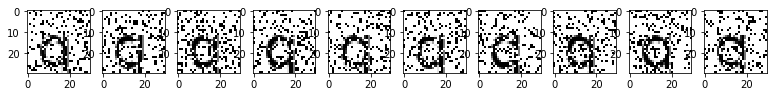

!! q correct= 9 wrong= 1 answers=['q', 'q', 'q', 'q', 'q', 'd', 'q', 'q', 'q', 'q']


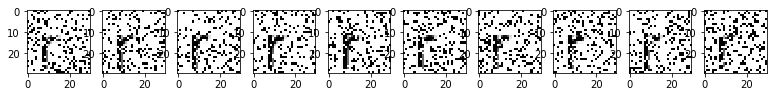

!! r correct=10 wrong= 0 answers=['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


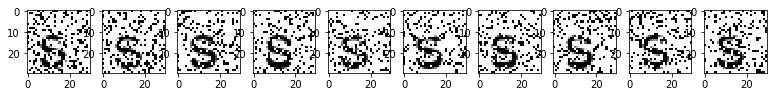

!! s correct=10 wrong= 0 answers=['s', 's', 's', 's', 's', 's', 's', 's', 's', 's']


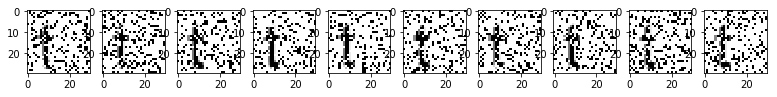

!! t correct= 9 wrong= 1 answers=['t', 'I', 't', 't', 't', 't', 't', 't', 't', 't']


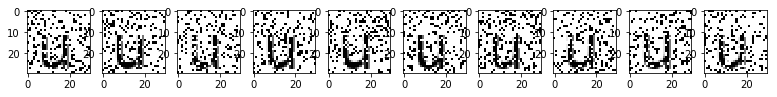

!! u correct=10 wrong= 0 answers=['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']


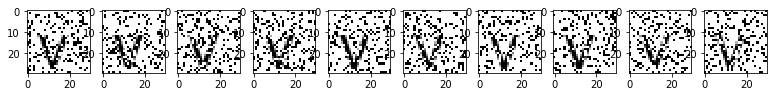

!! v correct=10 wrong= 0 answers=['v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v']


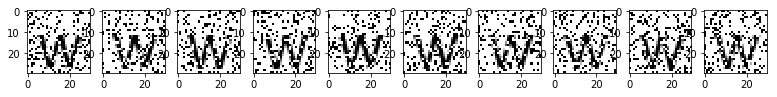

!! w correct=10 wrong= 0 answers=['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w']


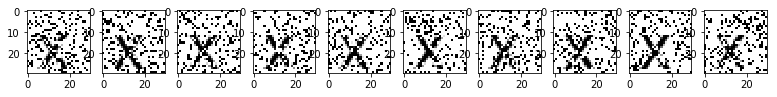

!! x correct= 7 wrong= 3 answers=['x', 'x', 'x', 'x', 'x', 'x', 'x', 'z', 'z', 'i']


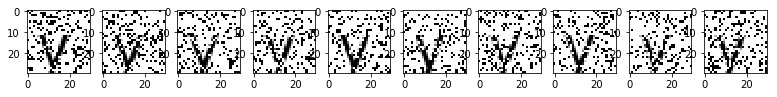

!! y correct= 7 wrong= 3 answers=['y', 'w', 'v', 'y', 'y', 'y', 'y', 'y', 'v', 'y']


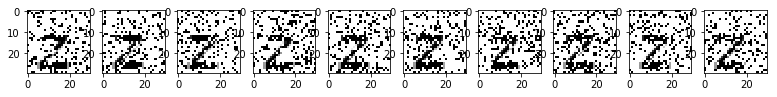

!! z correct=10 wrong= 0 answers=['z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z']


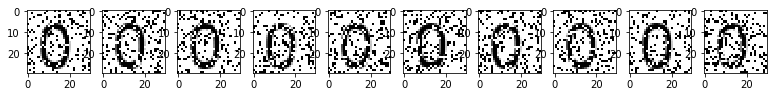

!! 0 correct=10 wrong= 0 answers=['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


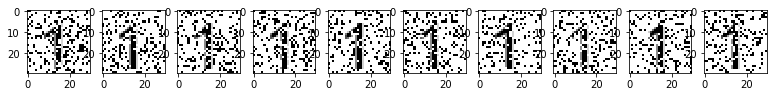

!! 1 correct=10 wrong= 0 answers=['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


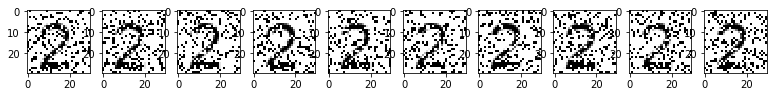

!! 2 correct=10 wrong= 0 answers=['2', '2', '2', '2', '2', '2', '2', '2', '2', '2']


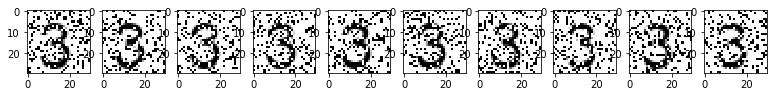

!! 3 correct=10 wrong= 0 answers=['3', '3', '3', '3', '3', '3', '3', '3', '3', '3']


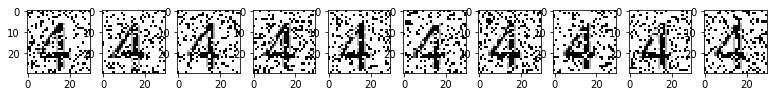

!! 4 correct=10 wrong= 0 answers=['4', '4', '4', '4', '4', '4', '4', '4', '4', '4']


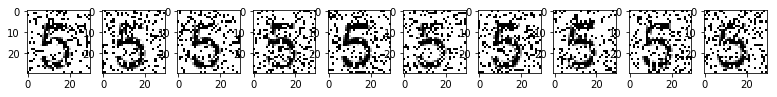

!! 5 correct=10 wrong= 0 answers=['5', '5', '5', '5', '5', '5', '5', '5', '5', '5']


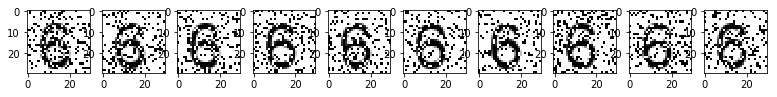

!! 6 correct=10 wrong= 0 answers=['6', '6', '6', '6', '6', '6', '6', '6', '6', '6']


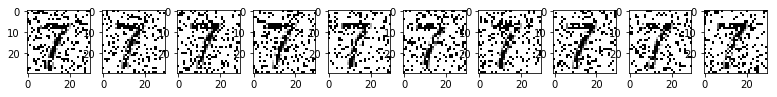

!! 7 correct=10 wrong= 0 answers=['7', '7', '7', '7', '7', '7', '7', '7', '7', '7']


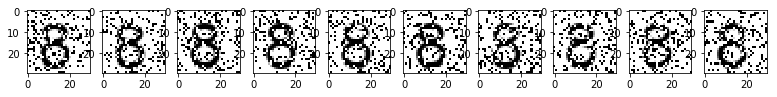

!! 8 correct= 2 wrong= 8 answers=['6', '6', '8', '6', '6', '8', '6', '6', '6', '6']


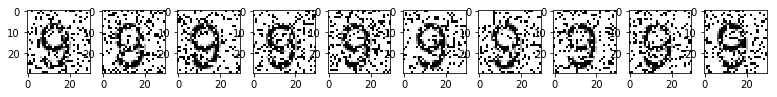

!! 9 correct= 7 wrong= 3 answers=['9', '0', '9', '0', '9', '9', '9', '9', '0', '9']


In [39]:
for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789':
    iter_read(x)

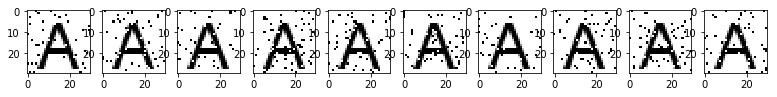

!! A correct=10 wrong= 0 answers=['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


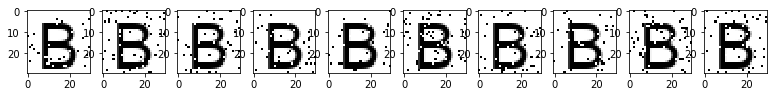

!! B correct=10 wrong= 0 answers=['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


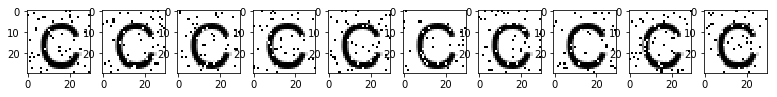

!! C correct=10 wrong= 0 answers=['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


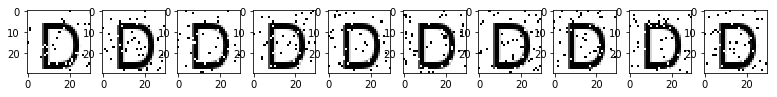

!! D correct=10 wrong= 0 answers=['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


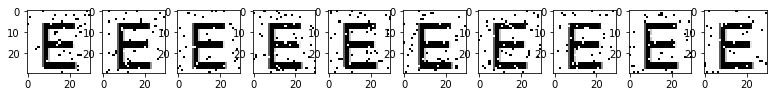

!! E correct=10 wrong= 0 answers=['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']


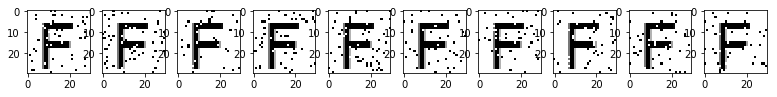

!! F correct=10 wrong= 0 answers=['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']


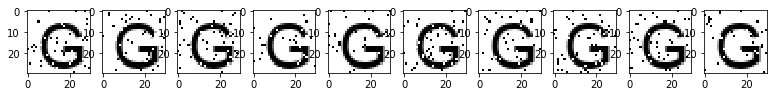

!! G correct=10 wrong= 0 answers=['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G']


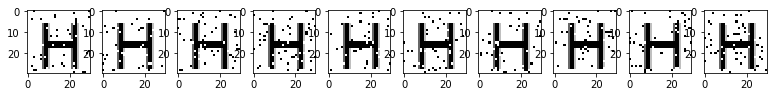

!! H correct=10 wrong= 0 answers=['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


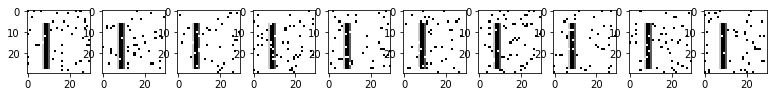

!! I correct=10 wrong= 0 answers=['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']


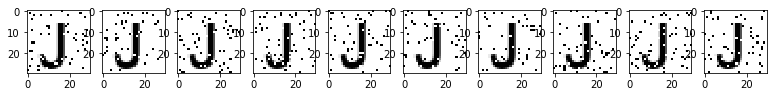

!! J correct=10 wrong= 0 answers=['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']


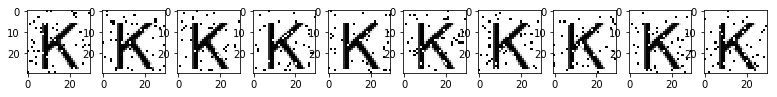

!! K correct=10 wrong= 0 answers=['K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K']


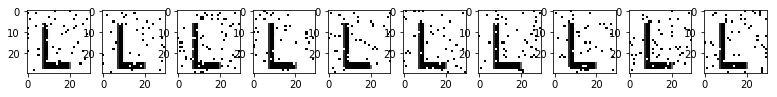

!! L correct= 0 wrong=10 answers=['i', 'I', 'I', 't', 't', 'i', 't', 't', 'I', 't']


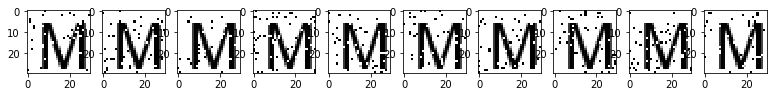

!! M correct=10 wrong= 0 answers=['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M']


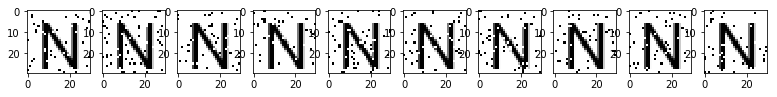

!! N correct=10 wrong= 0 answers=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


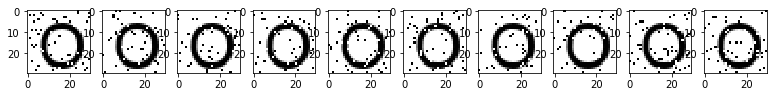

!! O correct= 9 wrong= 1 answers=['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'G', 'O']


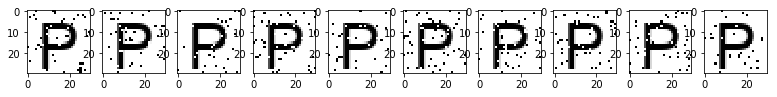

!! P correct=10 wrong= 0 answers=['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']


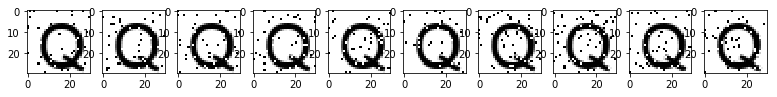

!! Q correct=10 wrong= 0 answers=['Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q']


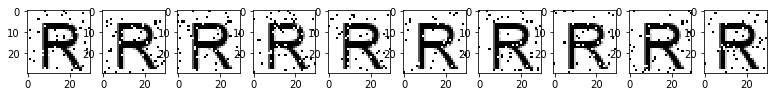

!! R correct=10 wrong= 0 answers=['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


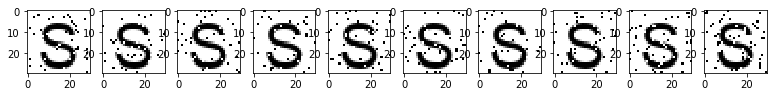

!! S correct=10 wrong= 0 answers=['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']


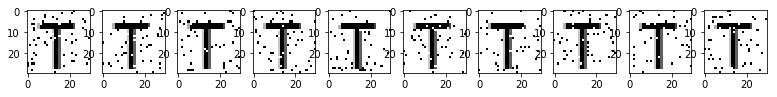

!! T correct=10 wrong= 0 answers=['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


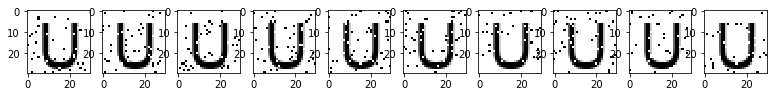

!! U correct=10 wrong= 0 answers=['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U']


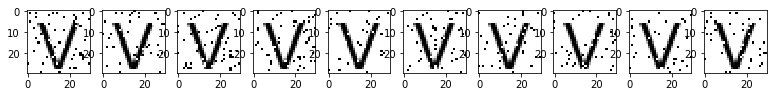

!! V correct=10 wrong= 0 answers=['V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V']


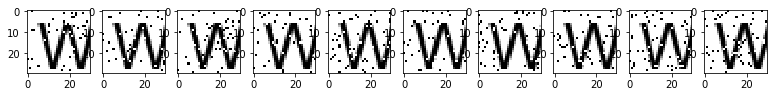

!! W correct=10 wrong= 0 answers=['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


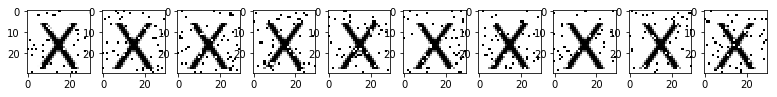

!! X correct=10 wrong= 0 answers=['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']


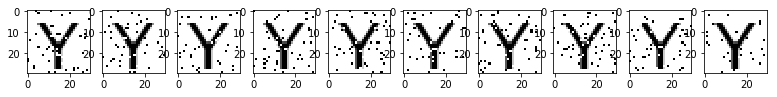

!! Y correct=10 wrong= 0 answers=['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']


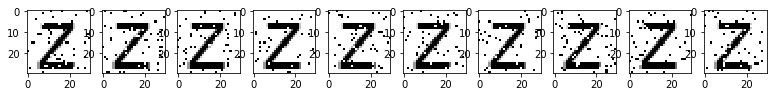

!! Z correct=10 wrong= 0 answers=['Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z']


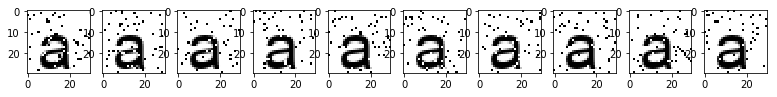

!! a correct=10 wrong= 0 answers=['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']


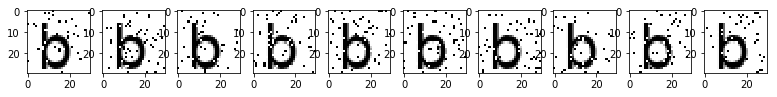

!! b correct=10 wrong= 0 answers=['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


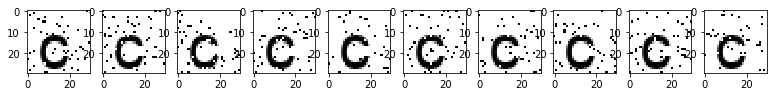

!! c correct=10 wrong= 0 answers=['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']


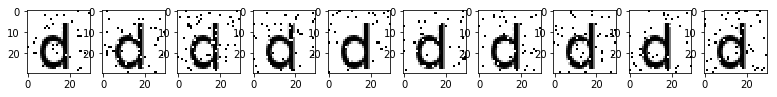

!! d correct=10 wrong= 0 answers=['d', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd']


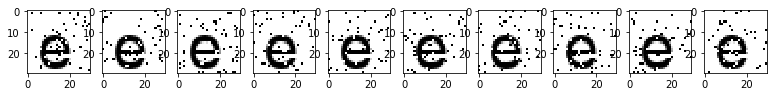

!! e correct= 6 wrong= 4 answers=['d', 'e', 'c', 'e', 'e', 'e', 'e', 'c', 'e', 'c']


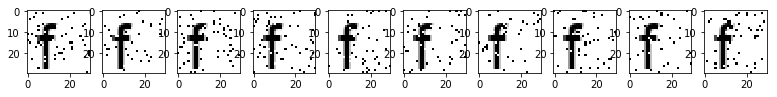

!! f correct=10 wrong= 0 answers=['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f']


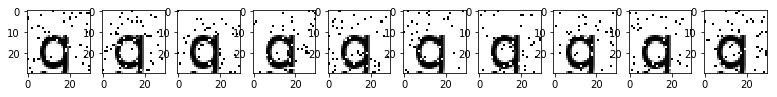

!! g correct= 5 wrong= 5 answers=['q', 'g', 'q', 'g', 'g', 'g', 'q', 'q', 'g', 'q']


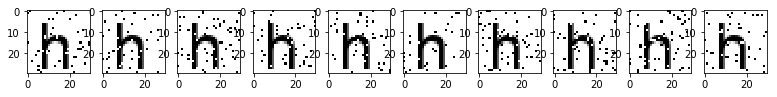

!! h correct=10 wrong= 0 answers=['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']


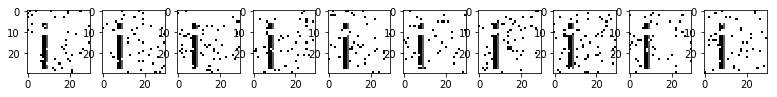

!! i correct=10 wrong= 0 answers=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i']


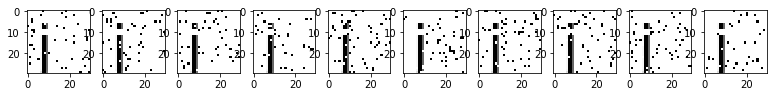

!! j correct= 4 wrong= 6 answers=['i', 'i', 'i', 'j', 'i', 'i', 'j', 'j', 'i', 'j']


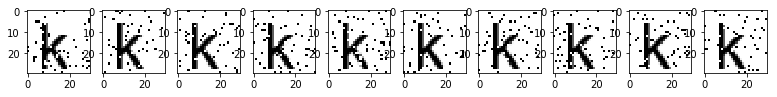

!! k correct=10 wrong= 0 answers=['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k']


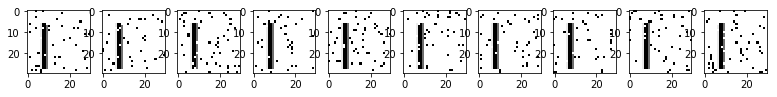

!! l correct=10 wrong= 0 answers=['l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l']


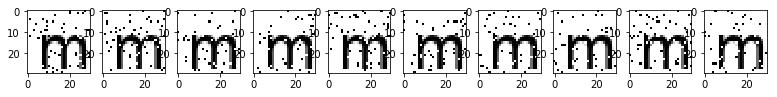

!! m correct=10 wrong= 0 answers=['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm']


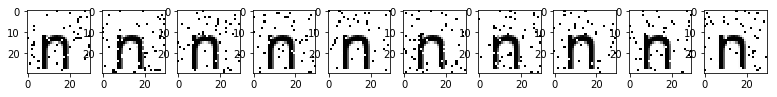

!! n correct=10 wrong= 0 answers=['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n']


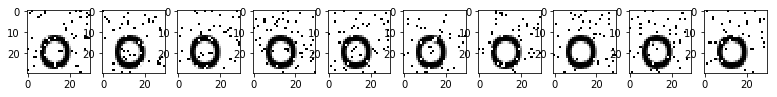

!! o correct= 0 wrong=10 answers=['c', 'c', 'c', 'c', 'd', 'c', 'q', 'd', 'd', 'd']


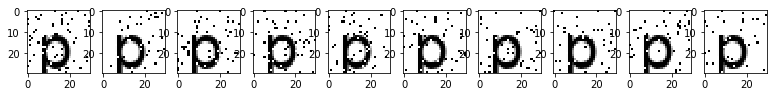

!! p correct= 3 wrong= 7 answers=['u', 'u', 'u', 'u', 'u', 'p', 'p', 'u', 'u', 'p']


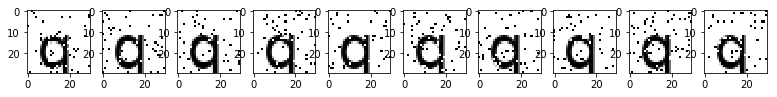

!! q correct=10 wrong= 0 answers=['q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q']


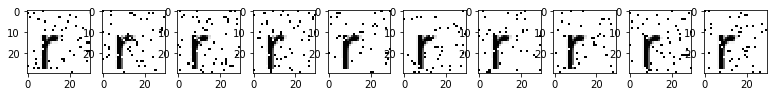

!! r correct=10 wrong= 0 answers=['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


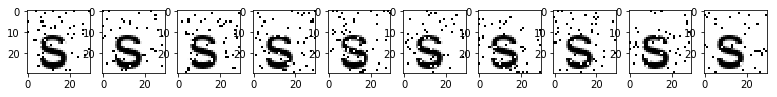

!! s correct=10 wrong= 0 answers=['s', 's', 's', 's', 's', 's', 's', 's', 's', 's']


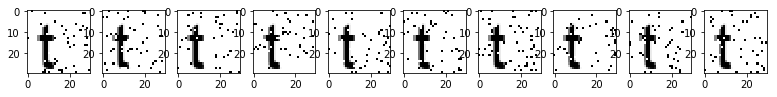

!! t correct=10 wrong= 0 answers=['t', 't', 't', 't', 't', 't', 't', 't', 't', 't']


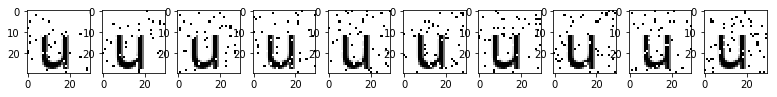

!! u correct=10 wrong= 0 answers=['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']


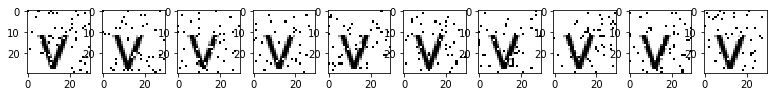

!! v correct=10 wrong= 0 answers=['v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v']


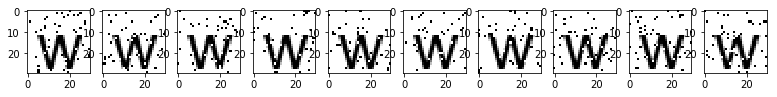

!! w correct=10 wrong= 0 answers=['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w']


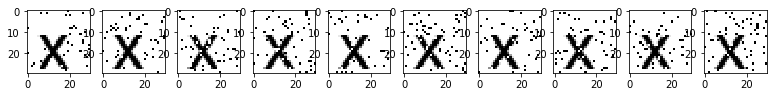

!! x correct=10 wrong= 0 answers=['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']


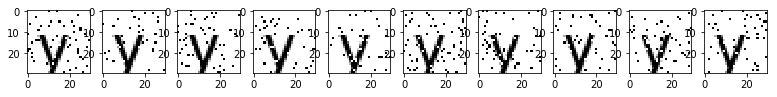

!! y correct=10 wrong= 0 answers=['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y']


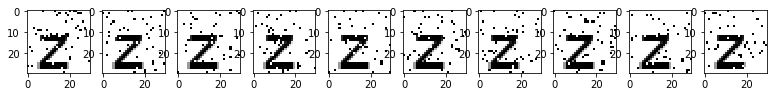

!! z correct=10 wrong= 0 answers=['z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z']


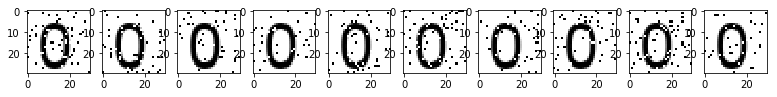

!! 0 correct=10 wrong= 0 answers=['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


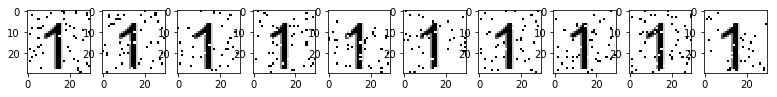

!! 1 correct=10 wrong= 0 answers=['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


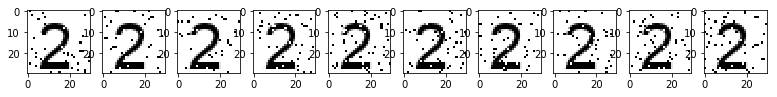

!! 2 correct=10 wrong= 0 answers=['2', '2', '2', '2', '2', '2', '2', '2', '2', '2']


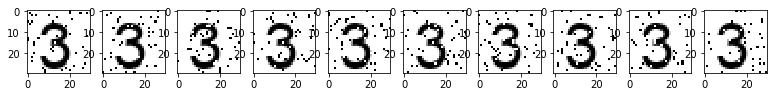

!! 3 correct=10 wrong= 0 answers=['3', '3', '3', '3', '3', '3', '3', '3', '3', '3']


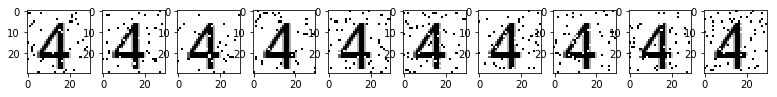

!! 4 correct=10 wrong= 0 answers=['4', '4', '4', '4', '4', '4', '4', '4', '4', '4']


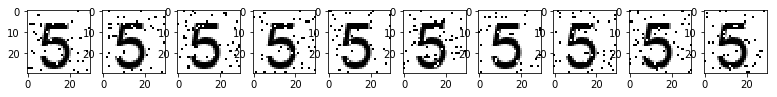

!! 5 correct=10 wrong= 0 answers=['5', '5', '5', '5', '5', '5', '5', '5', '5', '5']


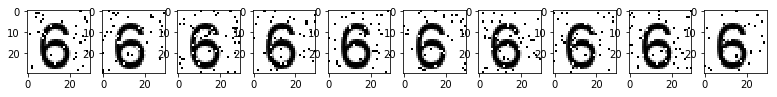

!! 6 correct=10 wrong= 0 answers=['6', '6', '6', '6', '6', '6', '6', '6', '6', '6']


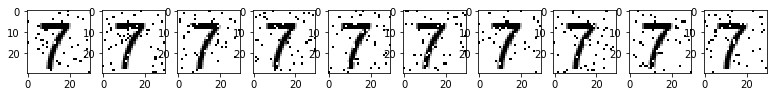

!! 7 correct=10 wrong= 0 answers=['7', '7', '7', '7', '7', '7', '7', '7', '7', '7']


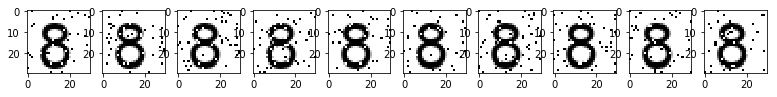

!! 8 correct= 9 wrong= 1 answers=['8', '8', '8', '6', '8', '8', '8', '8', '8', '8']


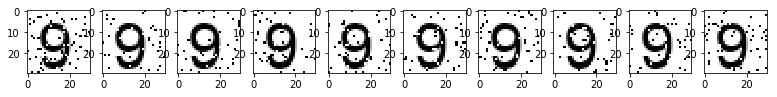

!! 9 correct=10 wrong= 0 answers=['9', '9', '9', '9', '9', '9', '9', '9', '9', '9']


In [40]:
for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789':
    iter_read(x, p=0.05)

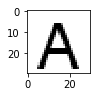

!! A correct= 1 wrong= 0 answers=['A']


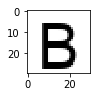

!! B correct= 1 wrong= 0 answers=['B']


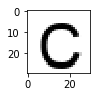

!! C correct= 1 wrong= 0 answers=['C']


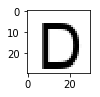

!! D correct= 1 wrong= 0 answers=['D']


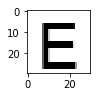

!! E correct= 1 wrong= 0 answers=['E']


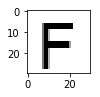

!! F correct= 1 wrong= 0 answers=['F']


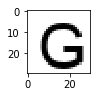

!! G correct= 1 wrong= 0 answers=['G']


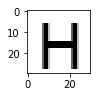

!! H correct= 1 wrong= 0 answers=['H']


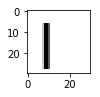

!! I correct= 1 wrong= 0 answers=['I']


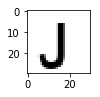

!! J correct= 1 wrong= 0 answers=['J']


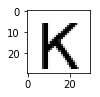

!! K correct= 1 wrong= 0 answers=['K']


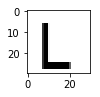

!! L correct= 0 wrong= 1 answers=['I']


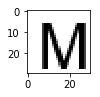

!! M correct= 1 wrong= 0 answers=['M']


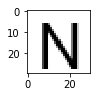

!! N correct= 1 wrong= 0 answers=['N']


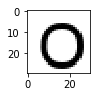

!! O correct= 1 wrong= 0 answers=['O']


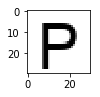

!! P correct= 1 wrong= 0 answers=['P']


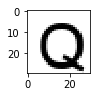

!! Q correct= 1 wrong= 0 answers=['Q']


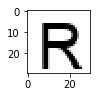

!! R correct= 1 wrong= 0 answers=['R']


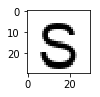

!! S correct= 1 wrong= 0 answers=['S']


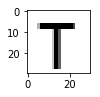

!! T correct= 1 wrong= 0 answers=['T']


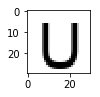

!! U correct= 1 wrong= 0 answers=['U']


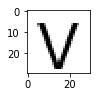

!! V correct= 1 wrong= 0 answers=['V']


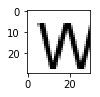

!! W correct= 1 wrong= 0 answers=['W']


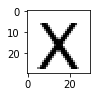

!! X correct= 1 wrong= 0 answers=['X']


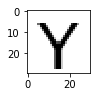

!! Y correct= 1 wrong= 0 answers=['Y']


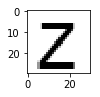

!! Z correct= 1 wrong= 0 answers=['Z']


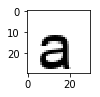

!! a correct= 1 wrong= 0 answers=['a']


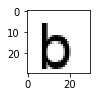

!! b correct= 1 wrong= 0 answers=['b']


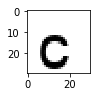

!! c correct= 1 wrong= 0 answers=['c']


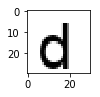

!! d correct= 1 wrong= 0 answers=['d']


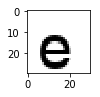

!! e correct= 1 wrong= 0 answers=['e']


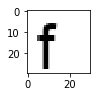

!! f correct= 1 wrong= 0 answers=['f']


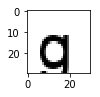

!! g correct= 0 wrong= 1 answers=['q']


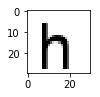

!! h correct= 1 wrong= 0 answers=['h']


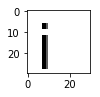

!! i correct= 1 wrong= 0 answers=['i']


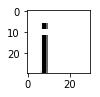

!! j correct= 1 wrong= 0 answers=['j']


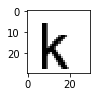

!! k correct= 1 wrong= 0 answers=['k']


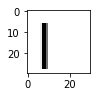

!! l correct= 1 wrong= 0 answers=['l']


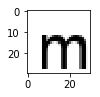

!! m correct= 1 wrong= 0 answers=['m']


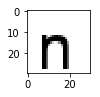

!! n correct= 1 wrong= 0 answers=['n']


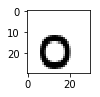

!! o correct= 0 wrong= 1 answers=['c']


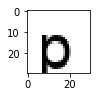

!! p correct= 1 wrong= 0 answers=['p']


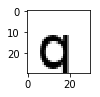

!! q correct= 1 wrong= 0 answers=['q']


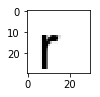

!! r correct= 1 wrong= 0 answers=['r']


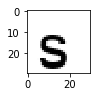

!! s correct= 1 wrong= 0 answers=['s']


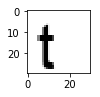

!! t correct= 1 wrong= 0 answers=['t']


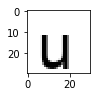

!! u correct= 1 wrong= 0 answers=['u']


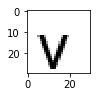

!! v correct= 1 wrong= 0 answers=['v']


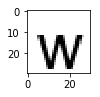

!! w correct= 1 wrong= 0 answers=['w']


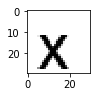

!! x correct= 1 wrong= 0 answers=['x']


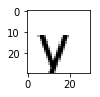

!! y correct= 1 wrong= 0 answers=['y']


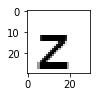

!! z correct= 1 wrong= 0 answers=['z']


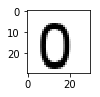

!! 0 correct= 1 wrong= 0 answers=['0']


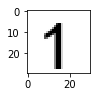

!! 1 correct= 1 wrong= 0 answers=['1']


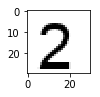

!! 2 correct= 1 wrong= 0 answers=['2']


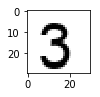

!! 3 correct= 1 wrong= 0 answers=['3']


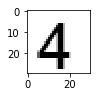

!! 4 correct= 1 wrong= 0 answers=['4']


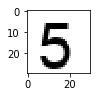

!! 5 correct= 1 wrong= 0 answers=['5']


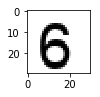

!! 6 correct= 1 wrong= 0 answers=['6']


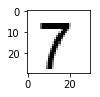

!! 7 correct= 1 wrong= 0 answers=['7']


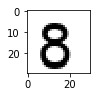

!! 8 correct= 1 wrong= 0 answers=['8']


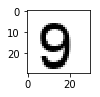

!! 9 correct= 1 wrong= 0 answers=['9']


In [41]:
for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789':
    iter_read(x, p=0, n=1)